In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [4]:
df = '/content/drive/MyDrive/DataSet/criminal.csv'
data = pd.read_csv(df, sep=',', encoding='cp949')
data

범죄별(1)                        범죄별(2)  범죄별(3)       2022   2022.1  \
0    범죄별(1)                        범죄별(2)  범죄별(3)         경찰       경찰   
1    범죄별(1)                        범죄별(2)  범죄별(3)          계   10일 이내   
2        합계                            소계      소계  1,398,452  180,805   
3       형법범                            소계      소계    839,514   77,917   
4       NaN                          재산범죄      소계    403,366   31,065   
..      ...                           ...     ...        ...      ...   
172     NaN                    화물자동차운수사업법      소계      1,510      200   
173     NaN           화재로인한재해보상과보험가입에관한법률      소계          7        0   
174     NaN  화재의예방및안전에관한법률/소방시설설치및관리에관한법률      소계        257        1   
175     NaN                       화학물질관리법      소계        427       65   
176     NaN                         기타특별법      소계     47,651    7,251   

      2022.2   2022.3   2022.4   2022.5   2022.6   2022.7   2022.8   2022.9  \
0         경찰       경찰       경찰       경찰       경찰       경찰       검찰       검찰   
1     20일 이내   1개월 이내   2개월 이내   3개월 이내   6개월 이내   6개월 초과        계   10일 이내   
2    175,099  137,704  272,638  177,002  259,315  195,889  996,622  526,505   
3     89,252   77,168  169,390  116,551  177,255  131,981  504,951  255,800   
4     32,879   30,019   69,574   52,407   95,881   91,541  222,963  113,672   
..       ...      ...      ...      ...      ...      ...      ...      ...   
172      231      187      351      176      247      118    1,263      726   
173        0        2        0        3        2        0        6        3   
174        3       25       50      112       35       31      854      297   
175       53       25       58       63       90       73      848      289   
176    6,097    4,660    8,779    5,505    8,599    6,760   40,462   17,446   

     2022.10 2022.11 2022.12 2022.13 2022.14 2022.15  
0         검찰      검찰      검찰      검찰      검찰      검찰  
1     20일 이내  1개월 이내  2개월 이내  3개월 이내  6개월 이내  6개월 초과  
2    136,862  95,860  87,137  54,732  84,063  11,463  
3     71,096  48,483  45,232  29,835  48,088   6,417  
4     29,377  20,669  19,620  13,436  22,597   3,592  
..       ...     ...     ...     ...     ...     ...  
172      136     107      95      58     113      28  
173        0       1       1       0       1       0  
174      193     102      96      55      96      15  
175      111      98     134      89     116      11  
176    5,731   4,777   4,440   2,857   4,580     631  

[177 rows x 19 columns]

In [5]:
data.info() # 데이터 컬럼명, 데이터 개수, 결측치, 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   범죄별(1)   5 non-null      object
 1   범죄별(2)   129 non-null    object
 2   범죄별(3)   177 non-null    object
 3   2022     177 non-null    object
 4   2022.1   177 non-null    object
 5   2022.2   177 non-null    object
 6   2022.3   177 non-null    object
 7   2022.4   177 non-null    object
 8   2022.5   177 non-null    object
 9   2022.6   177 non-null    object
 10  2022.7   177 non-null    object
 11  2022.8   177 non-null    object
 12  2022.9   177 non-null    object
 13  2022.10  177 non-null    object
 14  2022.11  177 non-null    object
 15  2022.12  177 non-null    object
 16  2022.13  177 non-null    object
 17  2022.14  177 non-null    object
 18  2022.15  177 non-null    object
dtypes: object(19)
memory usage: 26.4+ KB


In [6]:
data = data.fillna(method='ffill') # 윗값을 토대로 비어있는 칸만큼 윗값으로 결측치 보정

In [7]:
data.rename(columns={'2022':'경찰합계'}, inplace=True)             # 3개로 나뉜 각 컬럼명을 하나로 결합
data.rename(columns={'2022.1':'경찰_10일이내'}, inplace=True)
data.rename(columns={'2022.2':'경찰_20일이내'}, inplace=True)
data.rename(columns={'2022.3':'경찰_1개월이내'}, inplace=True)
data.rename(columns={'2022.4':'경찰_2개월이내'}, inplace=True)
data.rename(columns={'2022.5':'경찰_3개월이내'}, inplace=True)
data.rename(columns={'2022.6':'경찰_6개월이내'}, inplace=True)
data.rename(columns={'2022.7':'경찰_6개월초과'}, inplace=True)
data.rename(columns={'2022.8':'검찰합계'}, inplace=True)
data.rename(columns={'2022.9':'검찰_10일이내'}, inplace=True)
data.rename(columns={'2022.10':'검찰_20일이내'}, inplace=True)
data.rename(columns={'2022.11':'검찰_1개월이내'}, inplace=True)
data.rename(columns={'2022.12':'검찰_2개월이내'}, inplace=True)
data.rename(columns={'2022.13':'검찰_3개월이내'}, inplace=True)
data.rename(columns={'2022.14':'검찰_6개월이내'}, inplace=True)
data.rename(columns={'2022.15':'검찰_6개월초과'}, inplace=True)

In [8]:
data.drop([0, 1], axis=0, inplace=True) # 컬럼명 결합 후 필요없는 컬럼 삭제

In [9]:
data

범죄별(1)                        범죄별(2) 범죄별(3)       경찰합계 경찰_10일이내 경찰_20일이내  \
2       합계                            소계     소계  1,398,452  180,805  175,099   
3      형법범                            소계     소계    839,514   77,917   89,252   
4      형법범                          재산범죄     소계    403,366   31,065   32,879   
5      형법범                          재산범죄     절도     96,599   13,202   15,521   
6      형법범                          재산범죄     장물        573       46       37   
..     ...                           ...    ...        ...      ...      ...   
172   특별법범                    화물자동차운수사업법     소계      1,510      200      231   
173   특별법범           화재로인한재해보상과보험가입에관한법률     소계          7        0        0   
174   특별법범  화재의예방및안전에관한법률/소방시설설치및관리에관한법률     소계        257        1        3   
175   특별법범                       화학물질관리법     소계        427       65       53   
176   특별법범                         기타특별법     소계     47,651    7,251    6,097   

    경찰_1개월이내 경찰_2개월이내 경찰_3개월이내 경찰_6개월이내 경찰_6개월초과     검찰합계 검찰_10일이내 검찰_20일이내  \
2    137,704  272,638  177,002  259,315  195,889  996,622  526,505  136,862   
3     77,168  169,390  116,551  177,255  131,981  504,951  255,800   71,096   
4     30,019   69,574   52,407   95,881   91,541  222,963  113,672   29,377   
5     12,747   24,334   13,231   12,737    4,827   80,328   54,363   10,644   
6         49      109       89      161       82      439      160       73   
..       ...      ...      ...      ...      ...      ...      ...      ...   
172      187      351      176      247      118    1,263      726      136   
173        2        0        3        2        0        6        3        0   
174       25       50      112       35       31      854      297      193   
175       25       58       63       90       73      848      289      111   
176    4,660    8,779    5,505    8,599    6,760   40,462   17,446    5,731   

    검찰_1개월이내 검찰_2개월이내 검찰_3개월이내 검찰_6개월이내 검찰_6개월초과  
2     95,860   87,137   54,732   84,063   11,463  
3     48,483   45,232   29,835   48,088    6,417  
4     20,669   19,620   13,436   22,597    3,592  
5      5,917    4,724    2,215    2,341      124  
6         50       57       23       64       12  
..       ...      ...      ...      ...      ...  
172      107       95       58      113       28  
173        1        1        0        1        0  
174      102       96       55       96       15  
175       98      134       89      116       11  
176    4,777    4,440    2,857    4,580      631  

[175 rows x 19 columns]

In [10]:
# 각 데이터 object -> float 변환 위해 각 문자열 ',' 삭제 후 float 변환

data['경찰합계'] = data['경찰합계'].str.replace(',', '').astype('float64')
data['경찰_10일이내'] = data['경찰_10일이내'].str.replace(',', '').astype('float64')
data['경찰_20일이내'] = data['경찰_20일이내'].str.replace(',', '').astype('float64')
data['경찰_1개월이내'] = data['경찰_1개월이내'].str.replace(',', '').astype('float64')
data['경찰_2개월이내'] = data['경찰_2개월이내'].str.replace(',', '').astype('float64')
data['경찰_3개월이내'] = data['경찰_3개월이내'].str.replace(',', '').astype('float64')
data['경찰_6개월이내'] = data['경찰_6개월이내'].str.replace(',', '').astype('float64')
data['경찰_6개월초과'] = data['경찰_6개월초과'].str.replace(',', '').astype('float64')
data['검찰합계'] = data['검찰합계'].str.replace(',', '').astype('float64')
data['검찰_10일이내'] = data['검찰_10일이내'].str.replace(',', '').astype('float64')
data['검찰_20일이내'] = data['검찰_20일이내'].str.replace(',', '').astype('float64')
data['검찰_1개월이내'] = data['검찰_1개월이내'].str.replace(',', '').astype('float64')
data['검찰_2개월이내'] = data['검찰_2개월이내'].str.replace(',', '').astype('float64')
data['검찰_3개월이내'] = data['검찰_3개월이내'].str.replace(',', '').astype('float64')
data['검찰_6개월이내'] = data['검찰_6개월이내'].str.replace(',', '').astype('float64')
data['검찰_6개월초과'] = data['검찰_6개월초과'].str.replace(',', '').astype('float64')

In [11]:
data.head()

범죄별(1) 범죄별(2) 범죄별(3)       경찰합계  경찰_10일이내  경찰_20일이내  경찰_1개월이내  경찰_2개월이내  \
2     합계     소계     소계  1398452.0  180805.0  175099.0  137704.0  272638.0   
3    형법범     소계     소계   839514.0   77917.0   89252.0   77168.0  169390.0   
4    형법범   재산범죄     소계   403366.0   31065.0   32879.0   30019.0   69574.0   
5    형법범   재산범죄     절도    96599.0   13202.0   15521.0   12747.0   24334.0   
6    형법범   재산범죄     장물      573.0      46.0      37.0      49.0     109.0   

   경찰_3개월이내  경찰_6개월이내  경찰_6개월초과      검찰합계  검찰_10일이내  검찰_20일이내  검찰_1개월이내  \
2  177002.0  259315.0  195889.0  996622.0  526505.0  136862.0   95860.0   
3  116551.0  177255.0  131981.0  504951.0  255800.0   71096.0   48483.0   
4   52407.0   95881.0   91541.0  222963.0  113672.0   29377.0   20669.0   
5   13231.0   12737.0    4827.0   80328.0   54363.0   10644.0    5917.0   
6      89.0     161.0      82.0     439.0     160.0      73.0      50.0   

   검찰_2개월이내  검찰_3개월이내  검찰_6개월이내  검찰_6개월초과  
2   87137.0   54732.0   84063.0   11463.0  
3   45232.0   29835.0   48088.0    6417.0  
4   19620.0   13436.0   22597.0    3592.0  
5    4724.0    2215.0    2341.0     124.0  
6      57.0      23.0      64.0      12.0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 2 to 176
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   범죄별(1)    175 non-null    object 
 1   범죄별(2)    175 non-null    object 
 2   범죄별(3)    175 non-null    object 
 3   경찰합계      175 non-null    float64
 4   경찰_10일이내  175 non-null    float64
 5   경찰_20일이내  175 non-null    float64
 6   경찰_1개월이내  175 non-null    float64
 7   경찰_2개월이내  175 non-null    float64
 8   경찰_3개월이내  175 non-null    float64
 9   경찰_6개월이내  175 non-null    float64
 10  경찰_6개월초과  175 non-null    float64
 11  검찰합계      175 non-null    float64
 12  검찰_10일이내  175 non-null    float64
 13  검찰_20일이내  175 non-null    float64
 14  검찰_1개월이내  175 non-null    float64
 15  검찰_2개월이내  175 non-null    float64
 16  검찰_3개월이내  175 non-null    float64
 17  검찰_6개월이내  175 non-null    float64
 18  검찰_6개월초과  175 non-null    float64
dtypes: float64(16), object(3)
memory usage: 26.1+ KB


In [13]:
columns = list(data.columns)

In [14]:
def getCatCol(data):
    cat_columns = []
    for col in data.columns:
        if data[col].dtype == 'object':
            cat_columns.append(col)
    return cat_columns

In [15]:
cat_columns = getCatCol(data)

In [16]:
num_columns = [x for x in columns if x not in cat_columns]

In [17]:
print(columns)
print(cat_columns)
print(num_columns)

['범죄별(1)', '범죄별(2)', '범죄별(3)', '경찰합계', '경찰_10일이내', '경찰_20일이내', '경찰_1개월이내', '경찰_2개월이내', '경찰_3개월이내', '경찰_6개월이내', '경찰_6개월초과', '검찰합계', '검찰_10일이내', '검찰_20일이내', '검찰_1개월이내', '검찰_2개월이내', '검찰_3개월이내', '검찰_6개월이내', '검찰_6개월초과']
['범죄별(1)', '범죄별(2)', '범죄별(3)']
['경찰합계', '경찰_10일이내', '경찰_20일이내', '경찰_1개월이내', '경찰_2개월이내', '경찰_3개월이내', '경찰_6개월이내', '경찰_6개월초과', '검찰합계', '검찰_10일이내', '검찰_20일이내', '검찰_1개월이내', '검찰_2개월이내', '검찰_3개월이내', '검찰_6개월이내', '검찰_6개월초과']


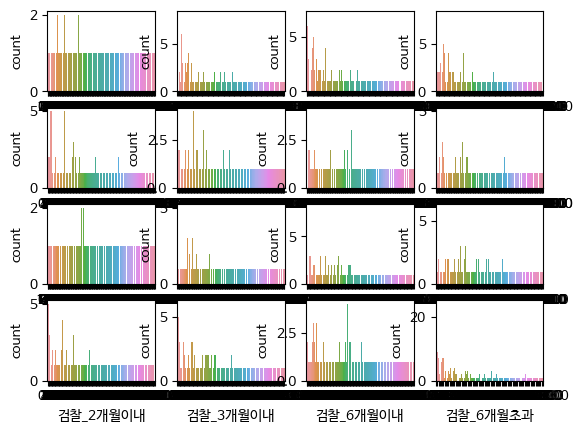

In [18]:
plt.subplot(4, 4, 1)
sns.countplot(data = data, x = "경찰합계")

plt.subplot(4, 4, 2)
sns.countplot(data = data, x = "경찰_10일이내")

plt.subplot(4, 4, 3)
sns.countplot(data = data, x = "경찰_20일이내")

plt.subplot(4, 4, 4)
sns.countplot(data = data, x = "경찰_1개월이내")

plt.subplot(4, 4, 5)
sns.countplot(data = data, x = "경찰_2개월이내")

plt.subplot(4, 4, 6)
sns.countplot(data = data, x = "경찰_3개월이내")

plt.subplot(4, 4, 7)
sns.countplot(data = data, x = "경찰_6개월이내")

plt.subplot(4, 4, 8)
sns.countplot(data = data, x = "경찰_6개월초과")

plt.subplot(4, 4, 9)
sns.countplot(data = data, x = "검찰합계")

plt.subplot(4, 4, 10)
sns.countplot(data = data, x = "검찰_10일이내")

plt.subplot(4, 4, 11)
sns.countplot(data = data, x = "검찰_20일이내")

plt.subplot(4, 4, 12)
sns.countplot(data = data, x = "검찰_1개월이내")

plt.subplot(4, 4, 13)
sns.countplot(data = data, x = "검찰_2개월이내")

plt.subplot(4, 4, 14)
sns.countplot(data = data, x = "검찰_3개월이내")

plt.subplot(4, 4, 15)
sns.countplot(data = data, x = "검찰_6개월이내")

plt.subplot(4, 4, 16)
sns.countplot(data = data, x = "검찰_6개월초과")

plt.show()

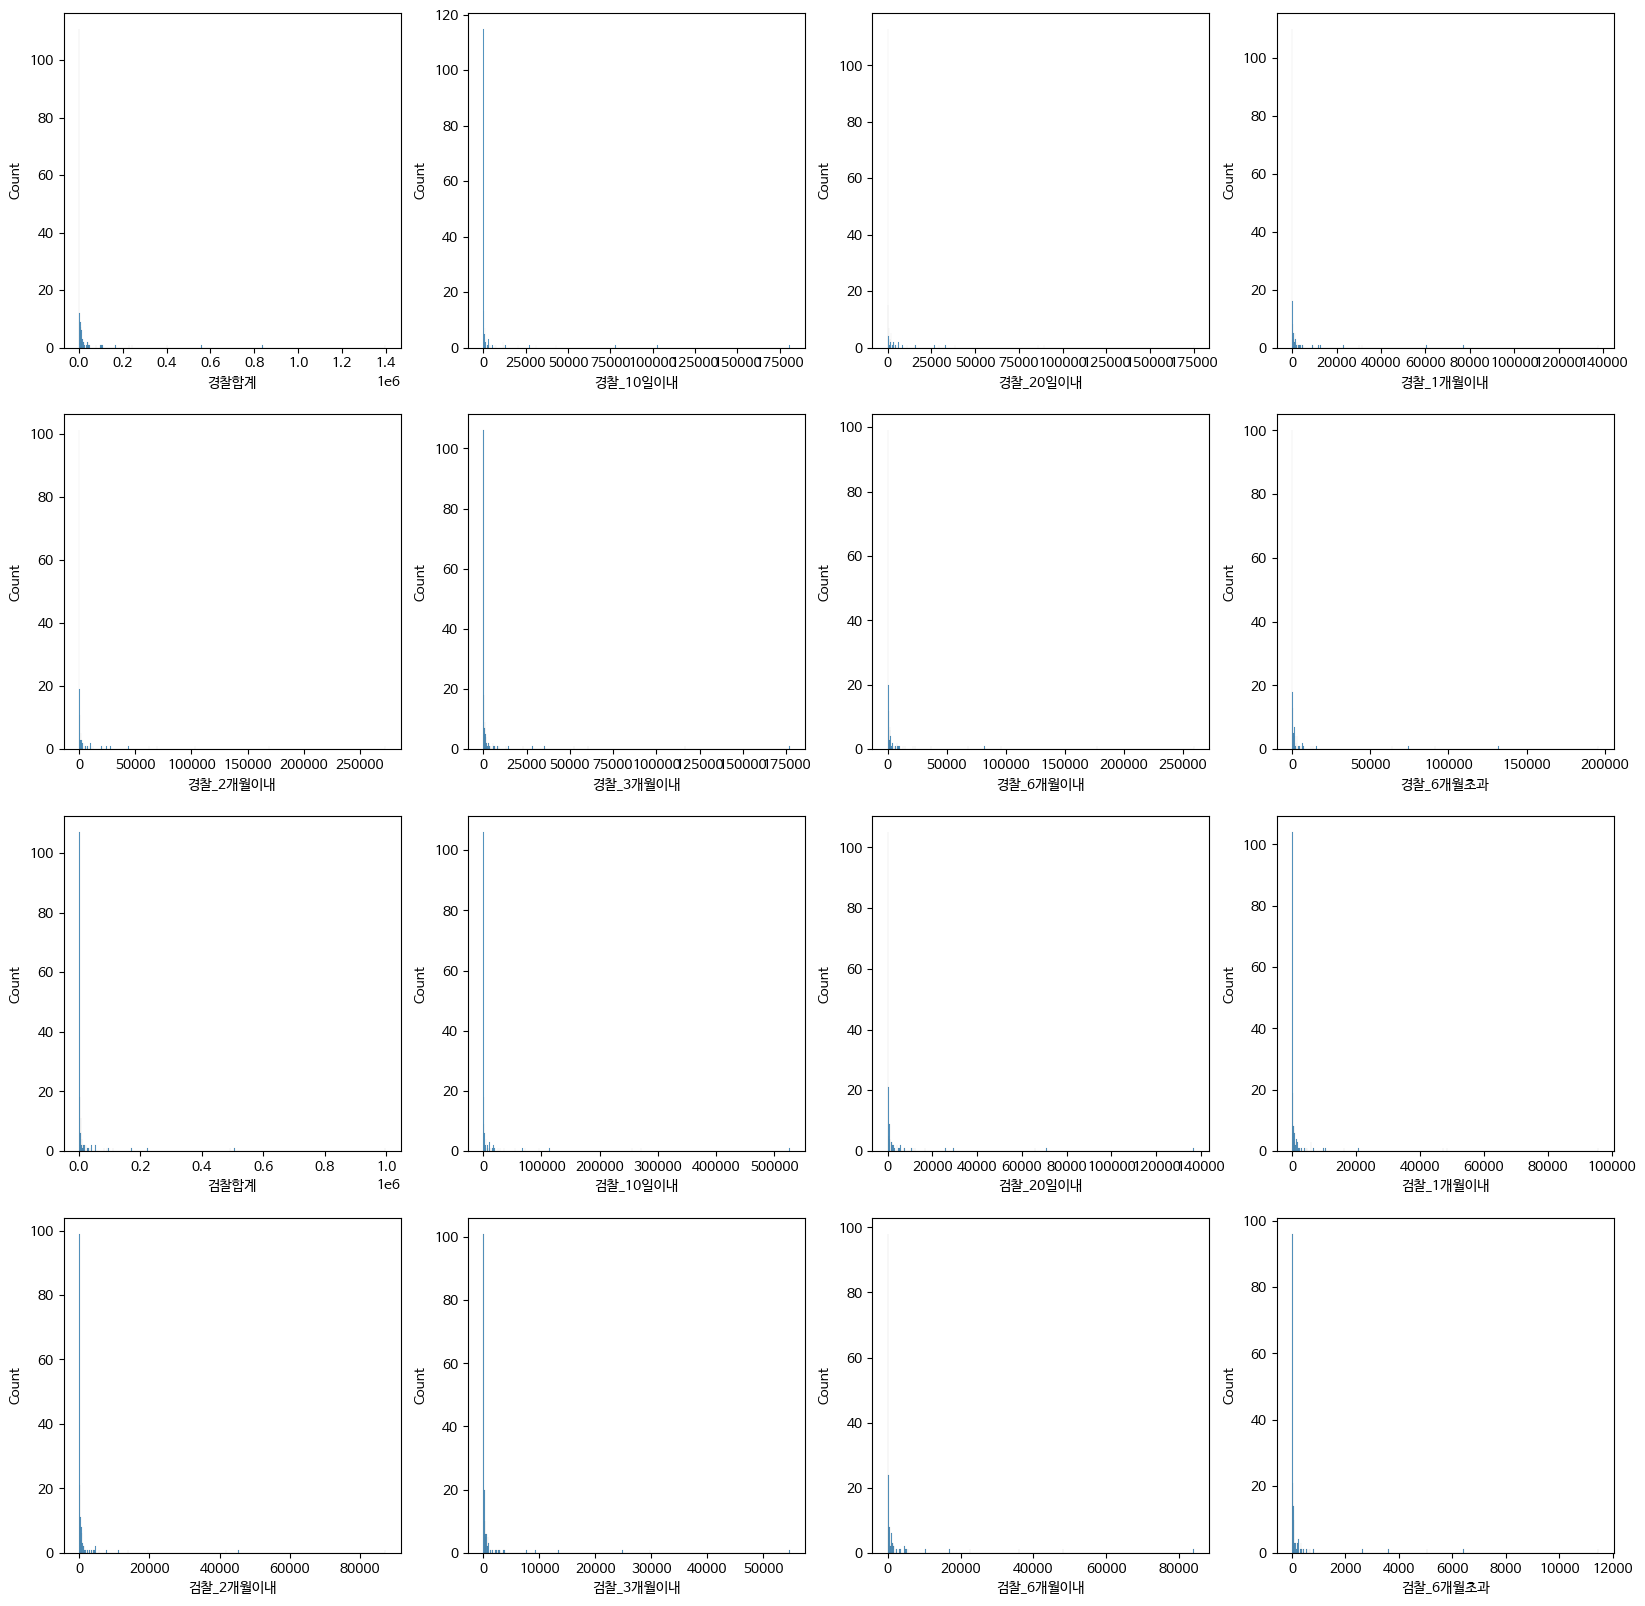

In [19]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 4, 1)
sns.histplot(data = data, x = "경찰합계")

plt.subplot(4, 4, 2)
sns.histplot(data = data, x = "경찰_10일이내")

plt.subplot(4, 4, 3)
sns.histplot(data = data, x = "경찰_20일이내")

plt.subplot(4, 4, 4)
sns.histplot(data = data, x = "경찰_1개월이내")

plt.subplot(4, 4, 5)
sns.histplot(data = data, x = "경찰_2개월이내")

plt.subplot(4, 4, 6)
sns.histplot(data = data, x = "경찰_3개월이내")

plt.subplot(4, 4, 7)
sns.histplot(data = data, x = "경찰_6개월이내")

plt.subplot(4, 4, 8)
sns.histplot(data = data, x = "경찰_6개월초과")

plt.subplot(4, 4, 9)
sns.histplot(data = data, x = "검찰합계")

plt.subplot(4, 4, 10)
sns.histplot(data = data, x = "검찰_10일이내")

plt.subplot(4, 4, 11)
sns.histplot(data = data, x = "검찰_20일이내")

plt.subplot(4, 4, 12)
sns.histplot(data = data, x = "검찰_1개월이내")

plt.subplot(4, 4, 13)
sns.histplot(data = data, x = "검찰_2개월이내")

plt.subplot(4, 4, 14)
sns.histplot(data = data, x = "검찰_3개월이내")

plt.subplot(4, 4, 15)
sns.histplot(data = data, x = "검찰_6개월이내")

plt.subplot(4, 4, 16)
sns.histplot(data = data, x = "검찰_6개월초과")

plt.show()

In [20]:
print(data["경찰합계"].value_counts())
print(data["경찰_10일이내"].value_counts())
print(data["경찰_20일이내"].value_counts())
print(data["경찰_1개월이내"].value_counts())
print(data["경찰_2개월이내"].value_counts())
print(data["경찰_3개월이내"].value_counts())
print(data["경찰_6개월이내"].value_counts())
print(data["경찰_6개월초과"].value_counts())
print(data["검찰합계"].value_counts())
print(data["검찰_10일이내"].value_counts())
print(data["검찰_20일이내"].value_counts())
print(data["검찰_1개월이내"].value_counts())
print(data["검찰_2개월이내"].value_counts())
print(data["검찰_3개월이내"].value_counts())
print(data["검찰_6개월이내"].value_counts())
print(data["검찰_6개월초과"].value_counts())

181.0        2
93.0         2
417.0        2
1398452.0    1
342.0        1
            ..
46339.0      1
3169.0       1
562.0        1
1565.0       1
47651.0      1
Name: 경찰합계, Length: 172, dtype: int64
0.0        8
1.0        8
5.0        6
15.0       4
24.0       3
          ..
260.0      1
2964.0     1
12354.0    1
71.0       1
7251.0     1
Name: 경찰_10일이내, Length: 128, dtype: int64
0.0       7
1.0       6
8.0       5
3.0       5
7.0       4
         ..
1868.0    1
2798.0    1
326.0     1
3538.0    1
6097.0    1
Name: 경찰_20일이내, Length: 127, dtype: int64
0.0       8
9.0       5
18.0      4
10.0      4
49.0      4
         ..
1546.0    1
2005.0    1
416.0     1
3396.0    1
4660.0    1
Name: 경찰_1개월이내, Length: 129, dtype: int64
52.0      5
8.0       5
5.0       5
0.0       4
35.0      3
         ..
342.0     1
30.0      1
3344.0    1
4215.0    1
8779.0    1
Name: 경찰_2개월이내, Length: 143, dtype: int64
0.0        4
37.0       4
25.0       3
14.0       3
58.0       3
          ..
2997.0     1

In [21]:
data.describe()

경찰합계       경찰_10일이내       경찰_20일이내       경찰_1개월이내  \
count  1.750000e+02     175.000000     175.000000     175.000000   
mean   2.877069e+04    3544.754286    3511.708571    2801.600000   
std    1.353174e+05   17284.434575   16766.663550   13225.811052   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    3.300000e+02      14.500000      12.500000      19.000000   
50%    1.318000e+03      88.000000      72.000000      89.000000   
75%    6.898500e+03     592.500000     655.500000     592.500000   
max    1.398452e+06  180805.000000  175099.000000  137704.000000   

            경찰_2개월이내       경찰_3개월이내       경찰_6개월이내       경찰_6개월초과  \
count     175.000000     175.000000     175.000000     175.000000   
mean     5641.737143    3700.325714    5458.285714    4112.274286   
std     26479.983022   17359.116255   25982.408004   20318.998643   
min         0.000000       0.000000       0.000000       0.000000   
25%        52.000000      45.500000      71.000000      53.500000   
50%       215.000000     168.000000     260.000000     176.000000   
75%       995.500000     889.500000    1173.500000     861.500000   
max    272638.000000  177002.000000  259315.000000  195889.000000   

                검찰합계       검찰_10일이내       검찰_20일이내     검찰_1개월이내      검찰_2개월이내  \
count     175.000000     175.000000     175.000000    175.00000    175.000000   
mean    19970.382857   10487.514286    2752.468571   1920.36000   1752.245714   
std     94446.169463   50104.761478   12982.049429   9066.72038   8242.202756   
min         0.000000       0.000000       0.000000      0.00000      0.000000   
25%       301.000000      76.000000      37.000000     31.00000     32.000000   
50%       994.000000     322.000000     136.000000    110.00000    127.000000   
75%      5292.000000    1934.000000     703.000000    529.50000    495.500000   
max    996622.000000  526505.000000  136862.000000  95860.00000  87137.000000   

           검찰_3개월이내      검찰_6개월이내      검찰_6개월초과  
count    175.000000    175.000000    175.000000  
mean    1108.748571   1715.868571    233.177143  
std     5199.414868   8046.228524   1104.064465  
min        0.000000      0.000000      0.000000  
25%       22.000000     46.500000      4.000000  
50%       81.000000    120.000000     17.000000  
75%      340.000000    516.500000     68.500000  
max    54732.000000  84063.000000  11463.000000

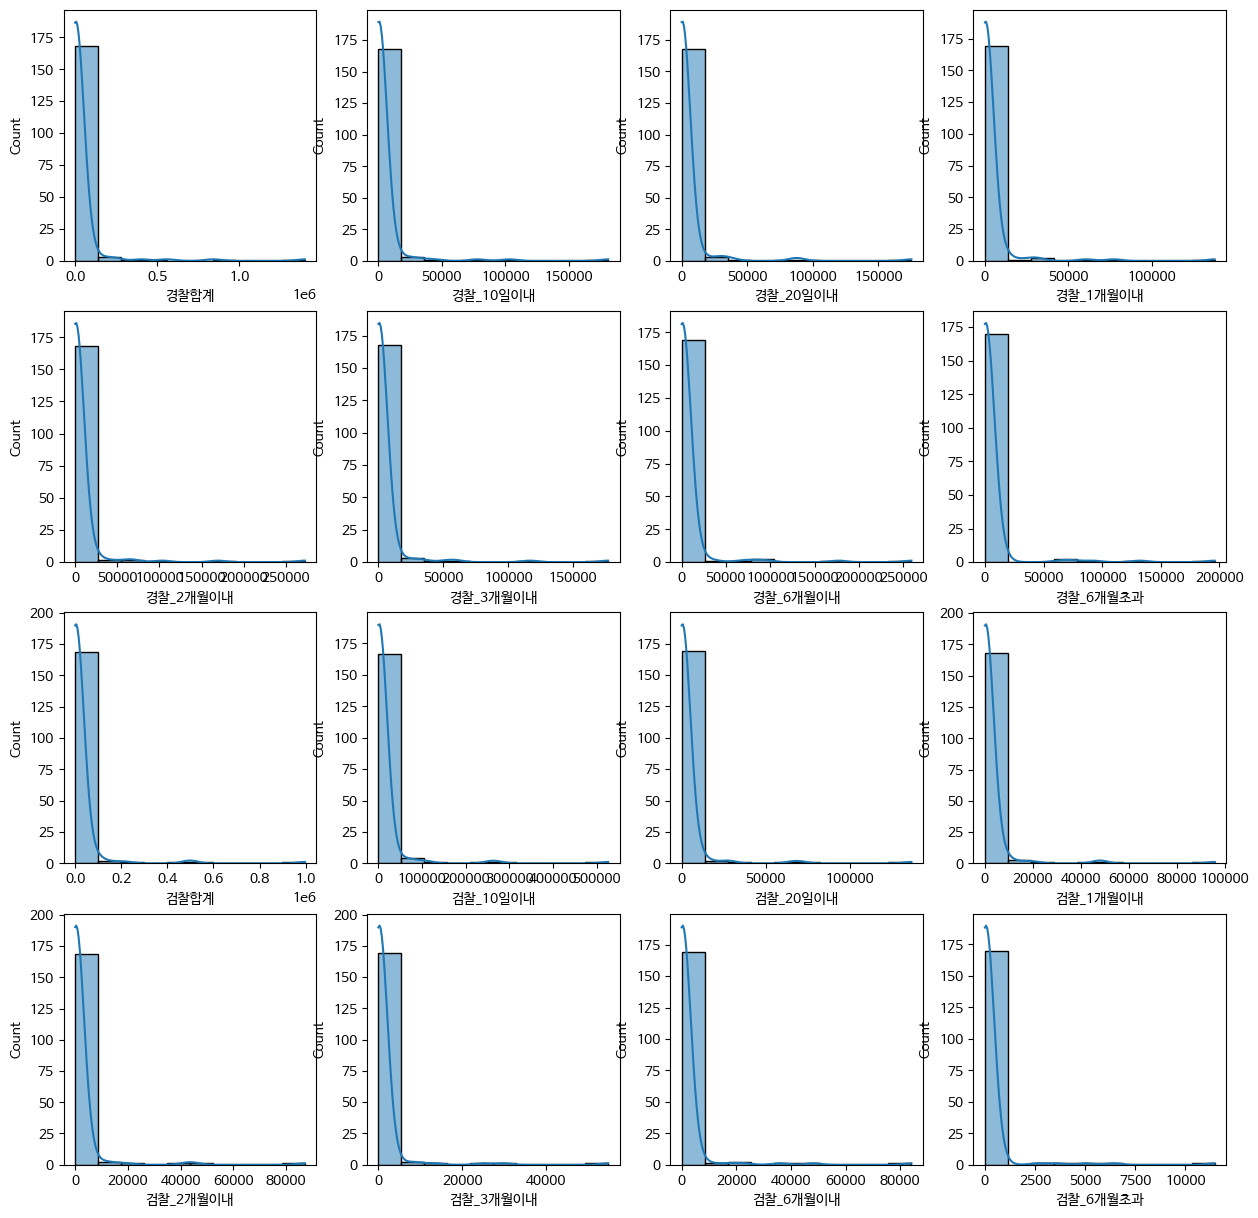

In [45]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  plt.subplot(4, 4, i+1)
  sns.histplot(data = data, x = num_columns[i],
      bins = 10,
      kde = True,
      );

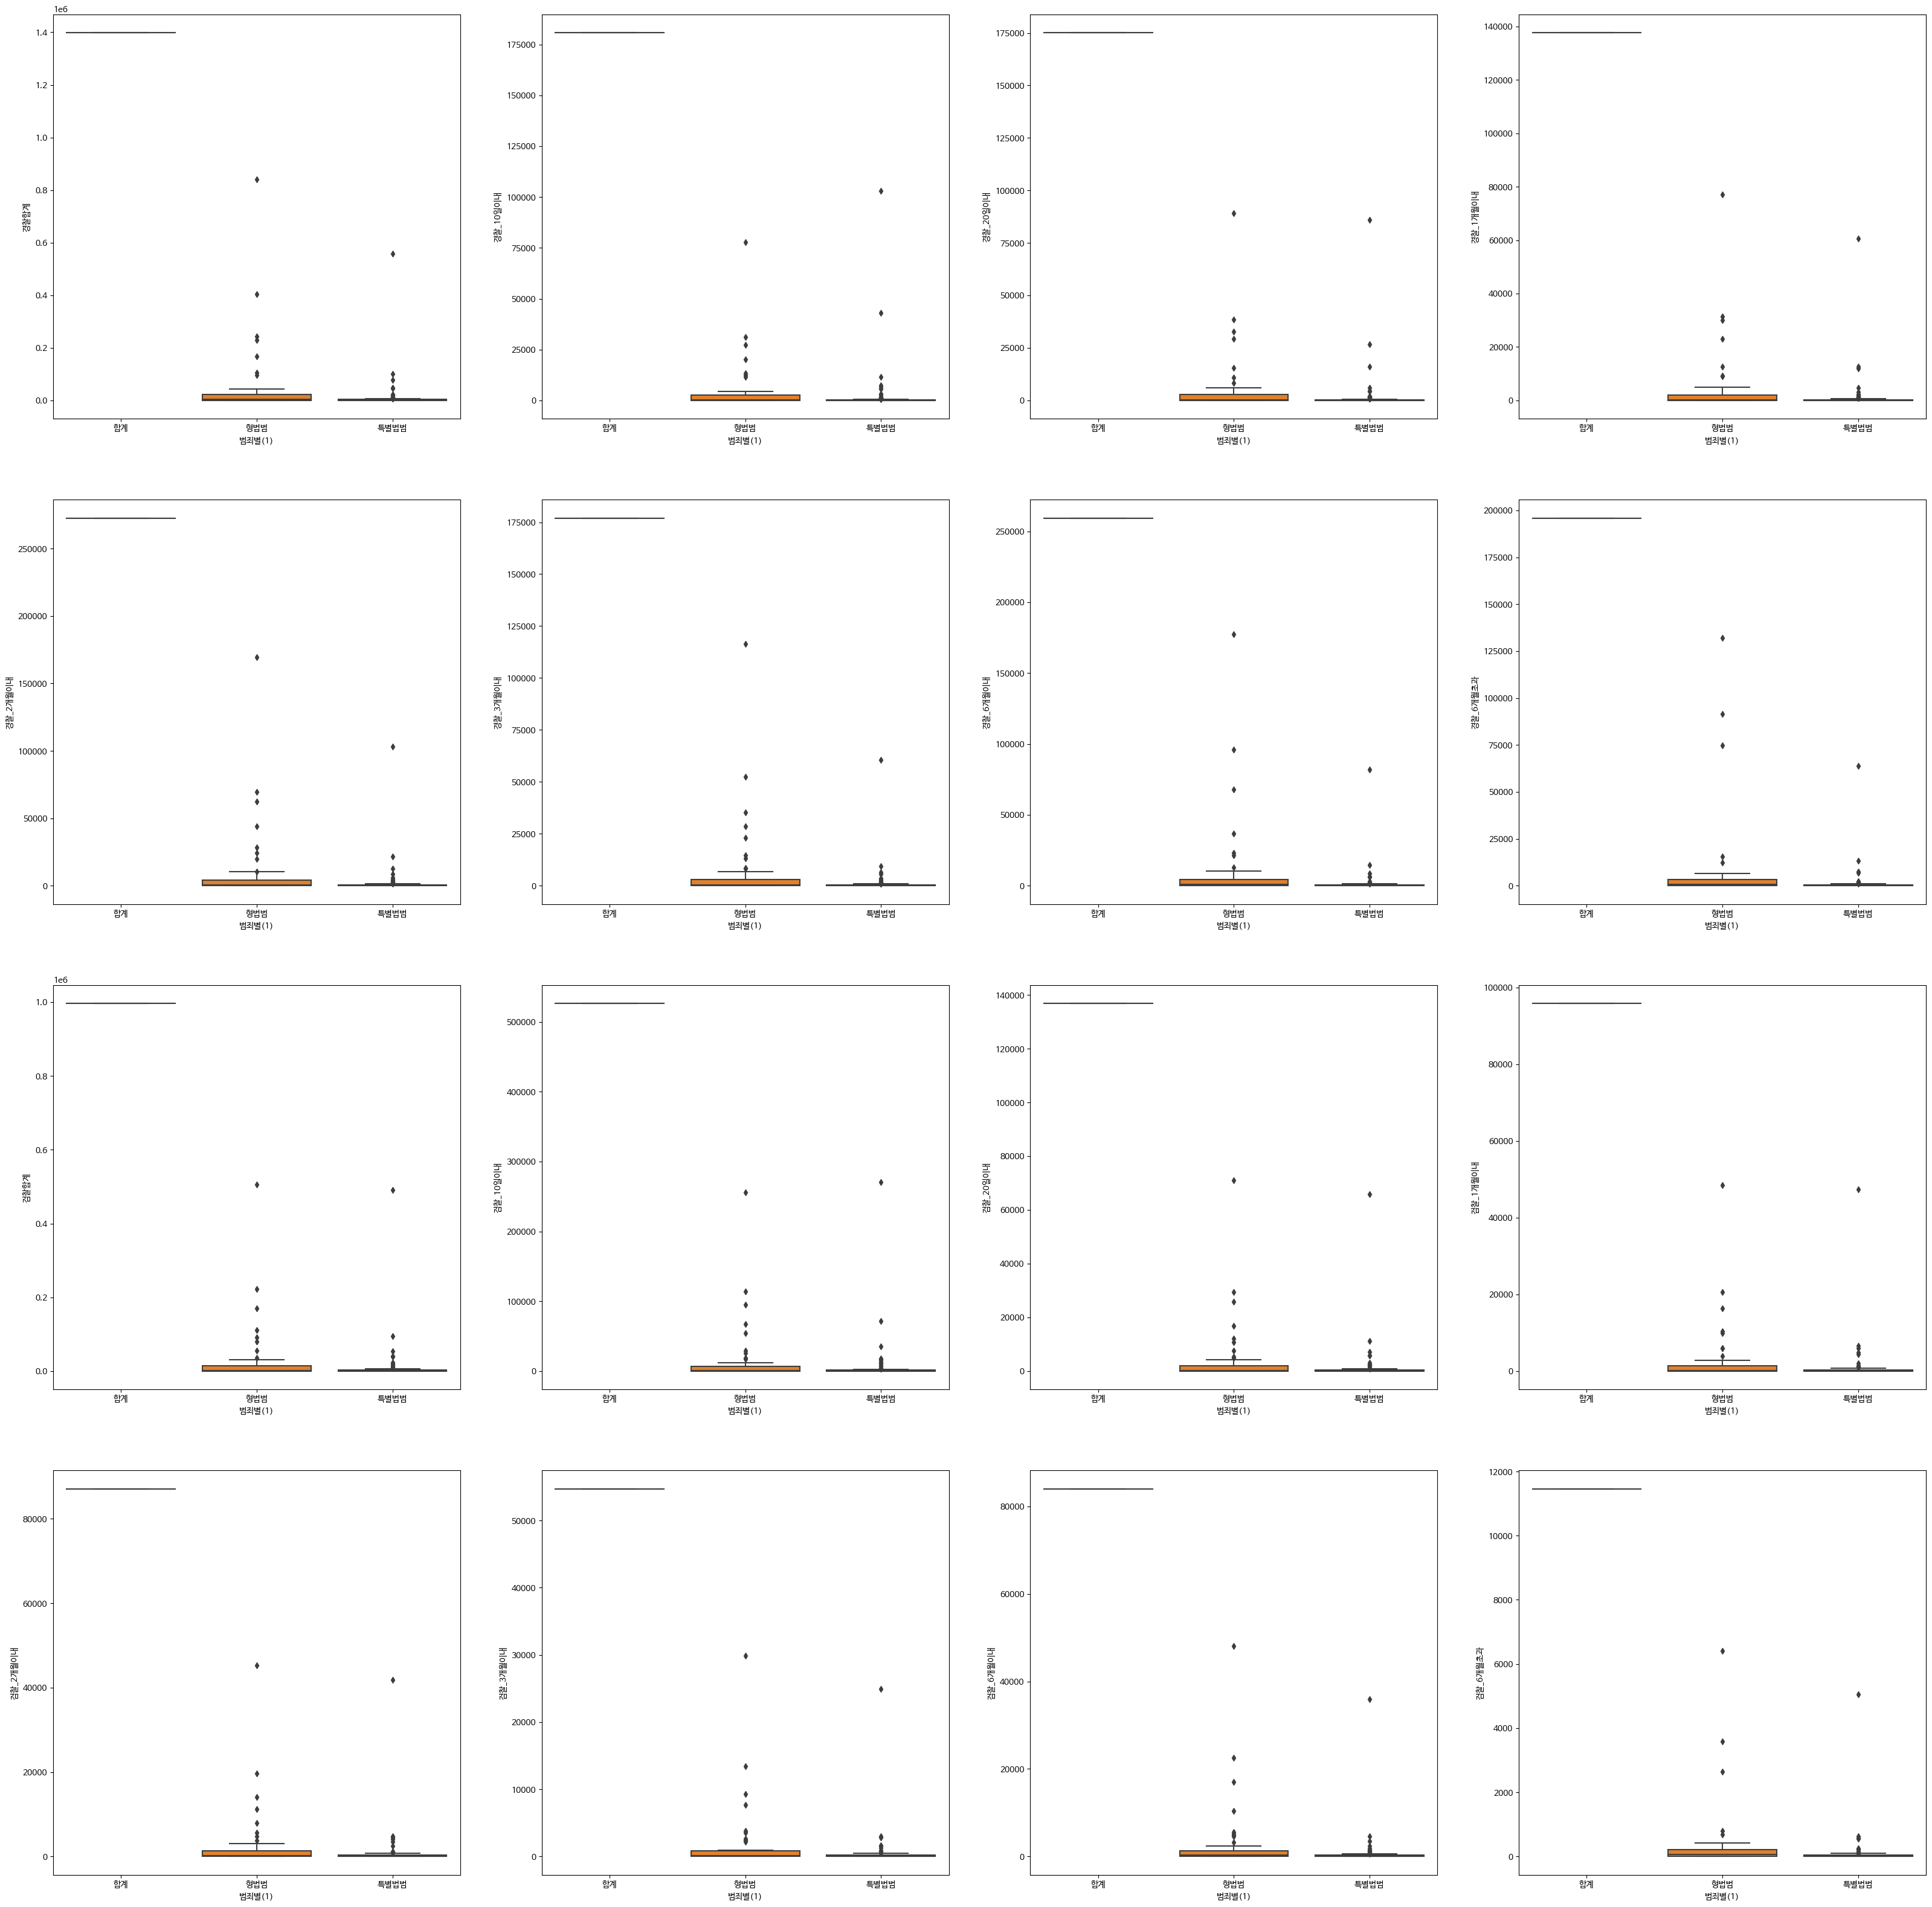

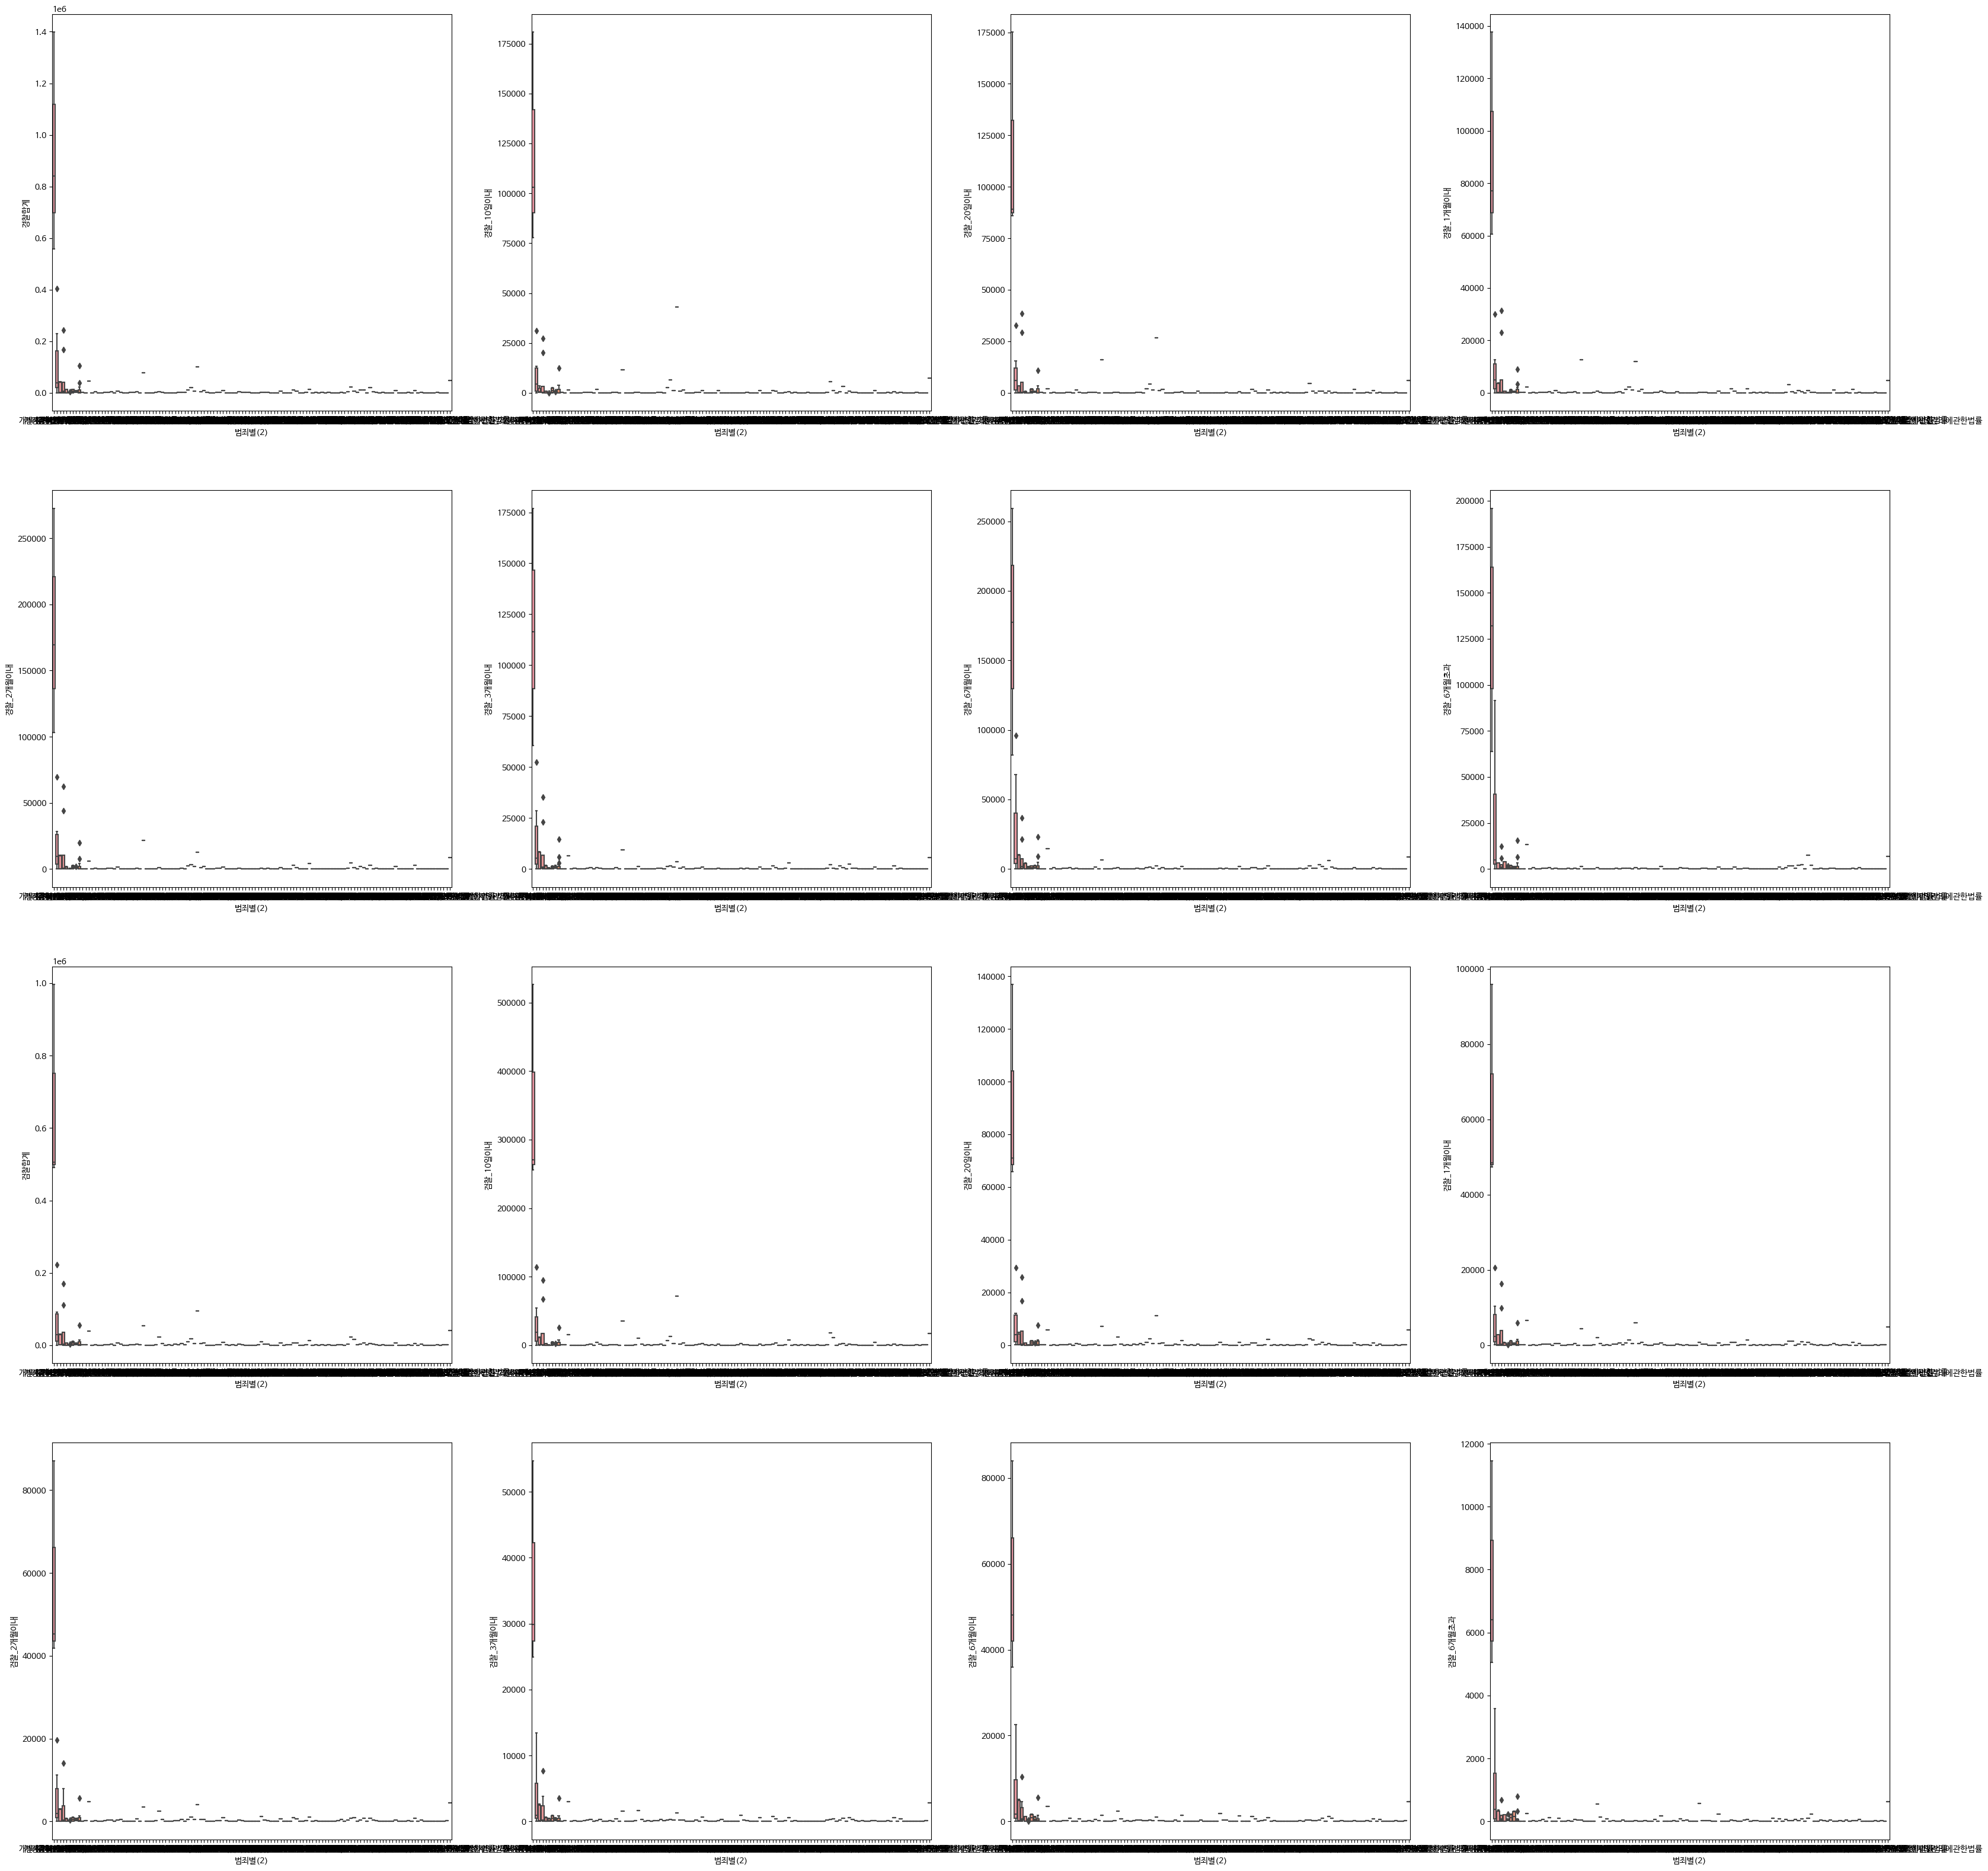

In [23]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "범죄별(1)", y = num_columns[i])

plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "범죄별(2)", y = num_columns[i])

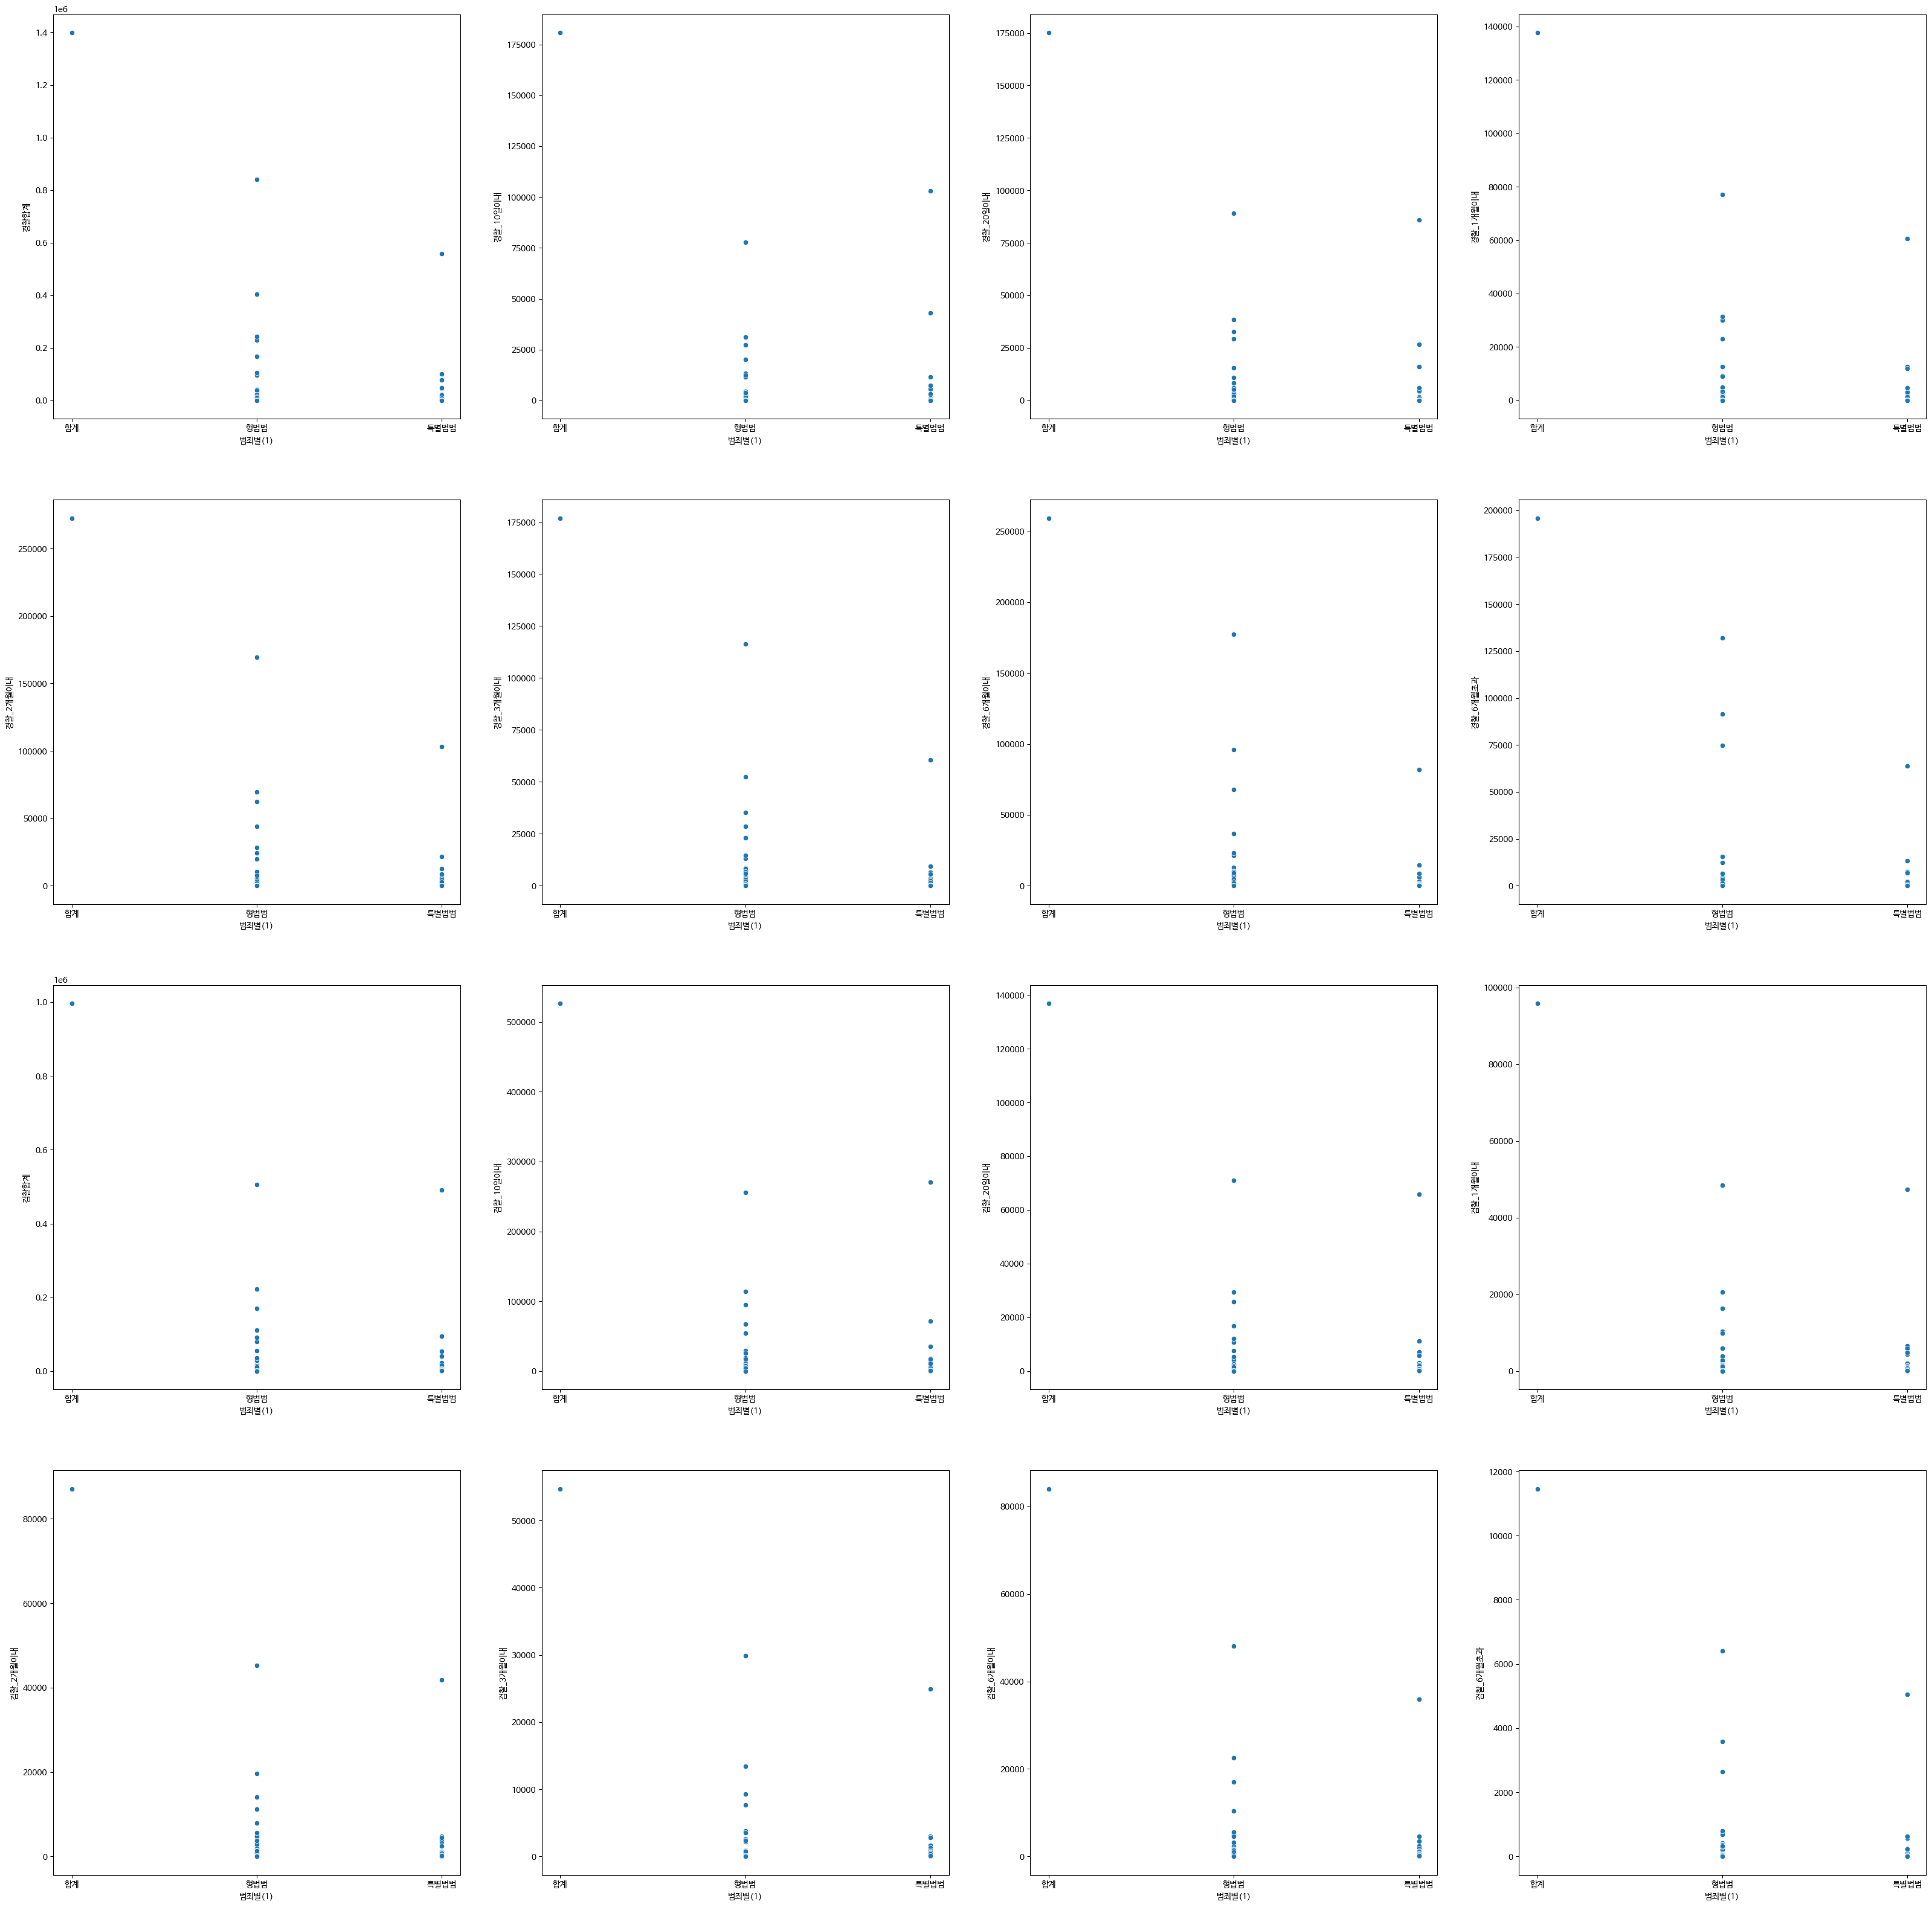

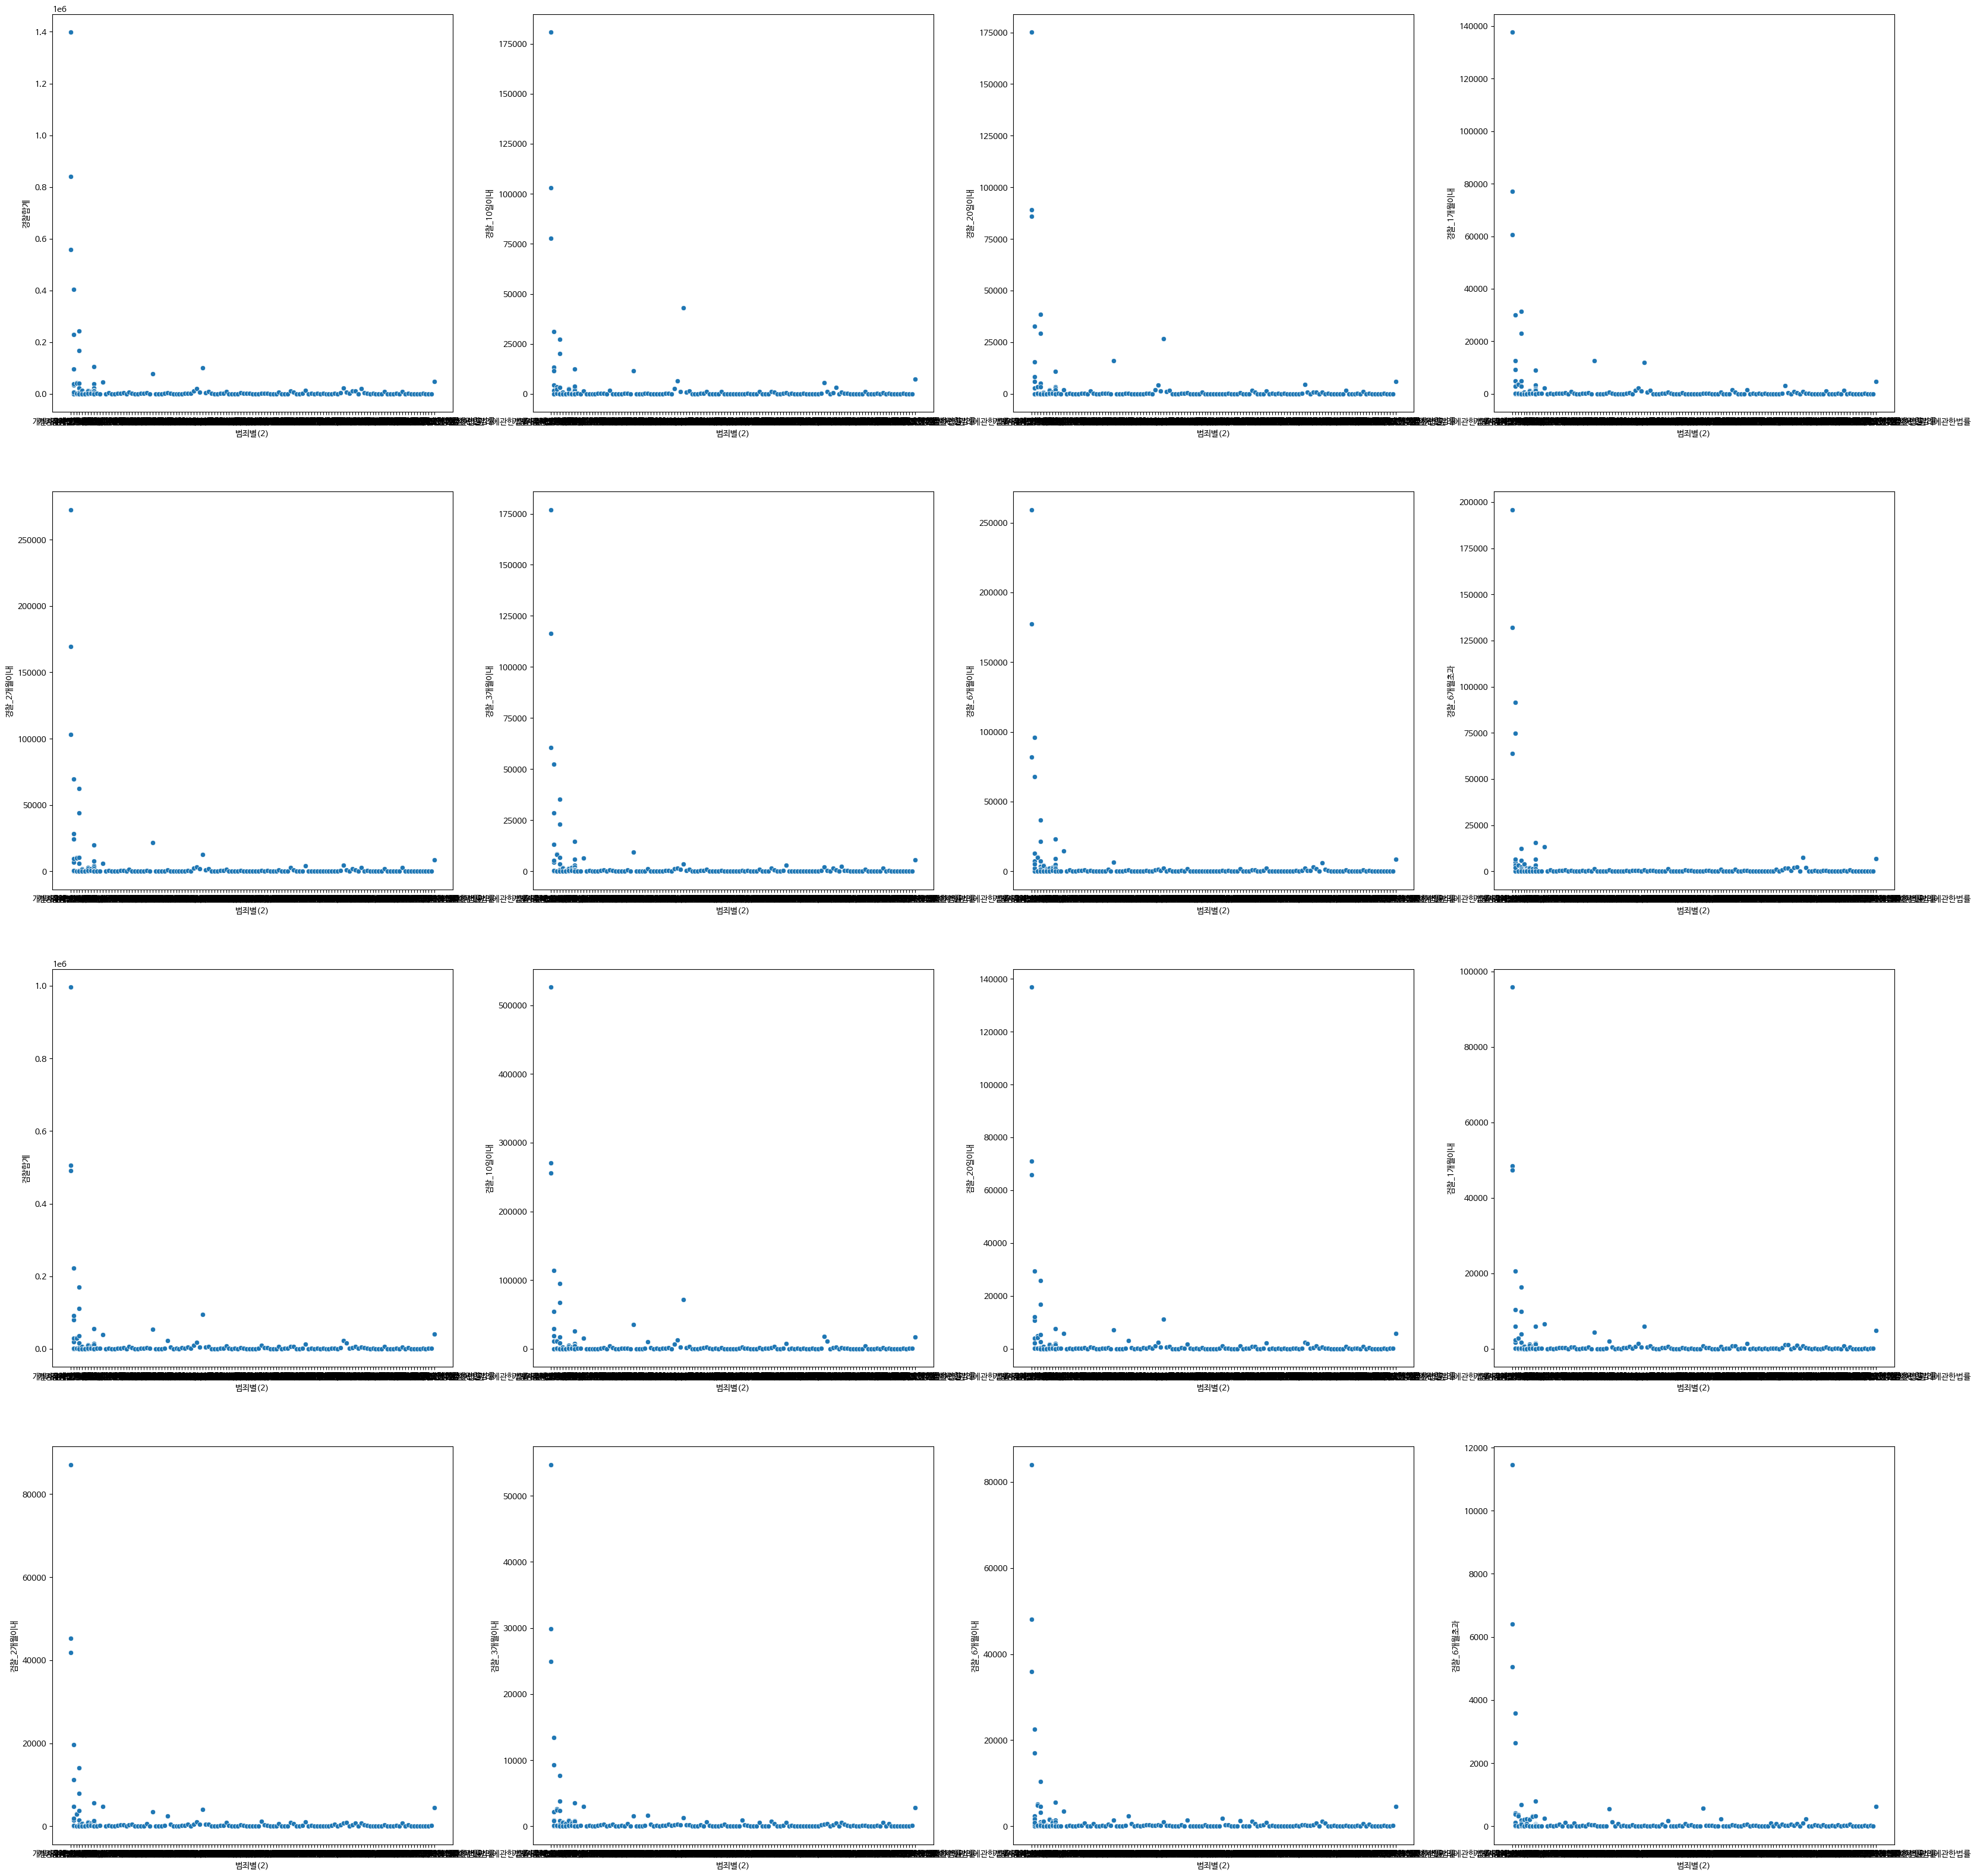

In [24]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.scatterplot(data = data, x = "범죄별(1)", y = num_columns[i])

plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.scatterplot(data = data, x = "범죄별(2)", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect co

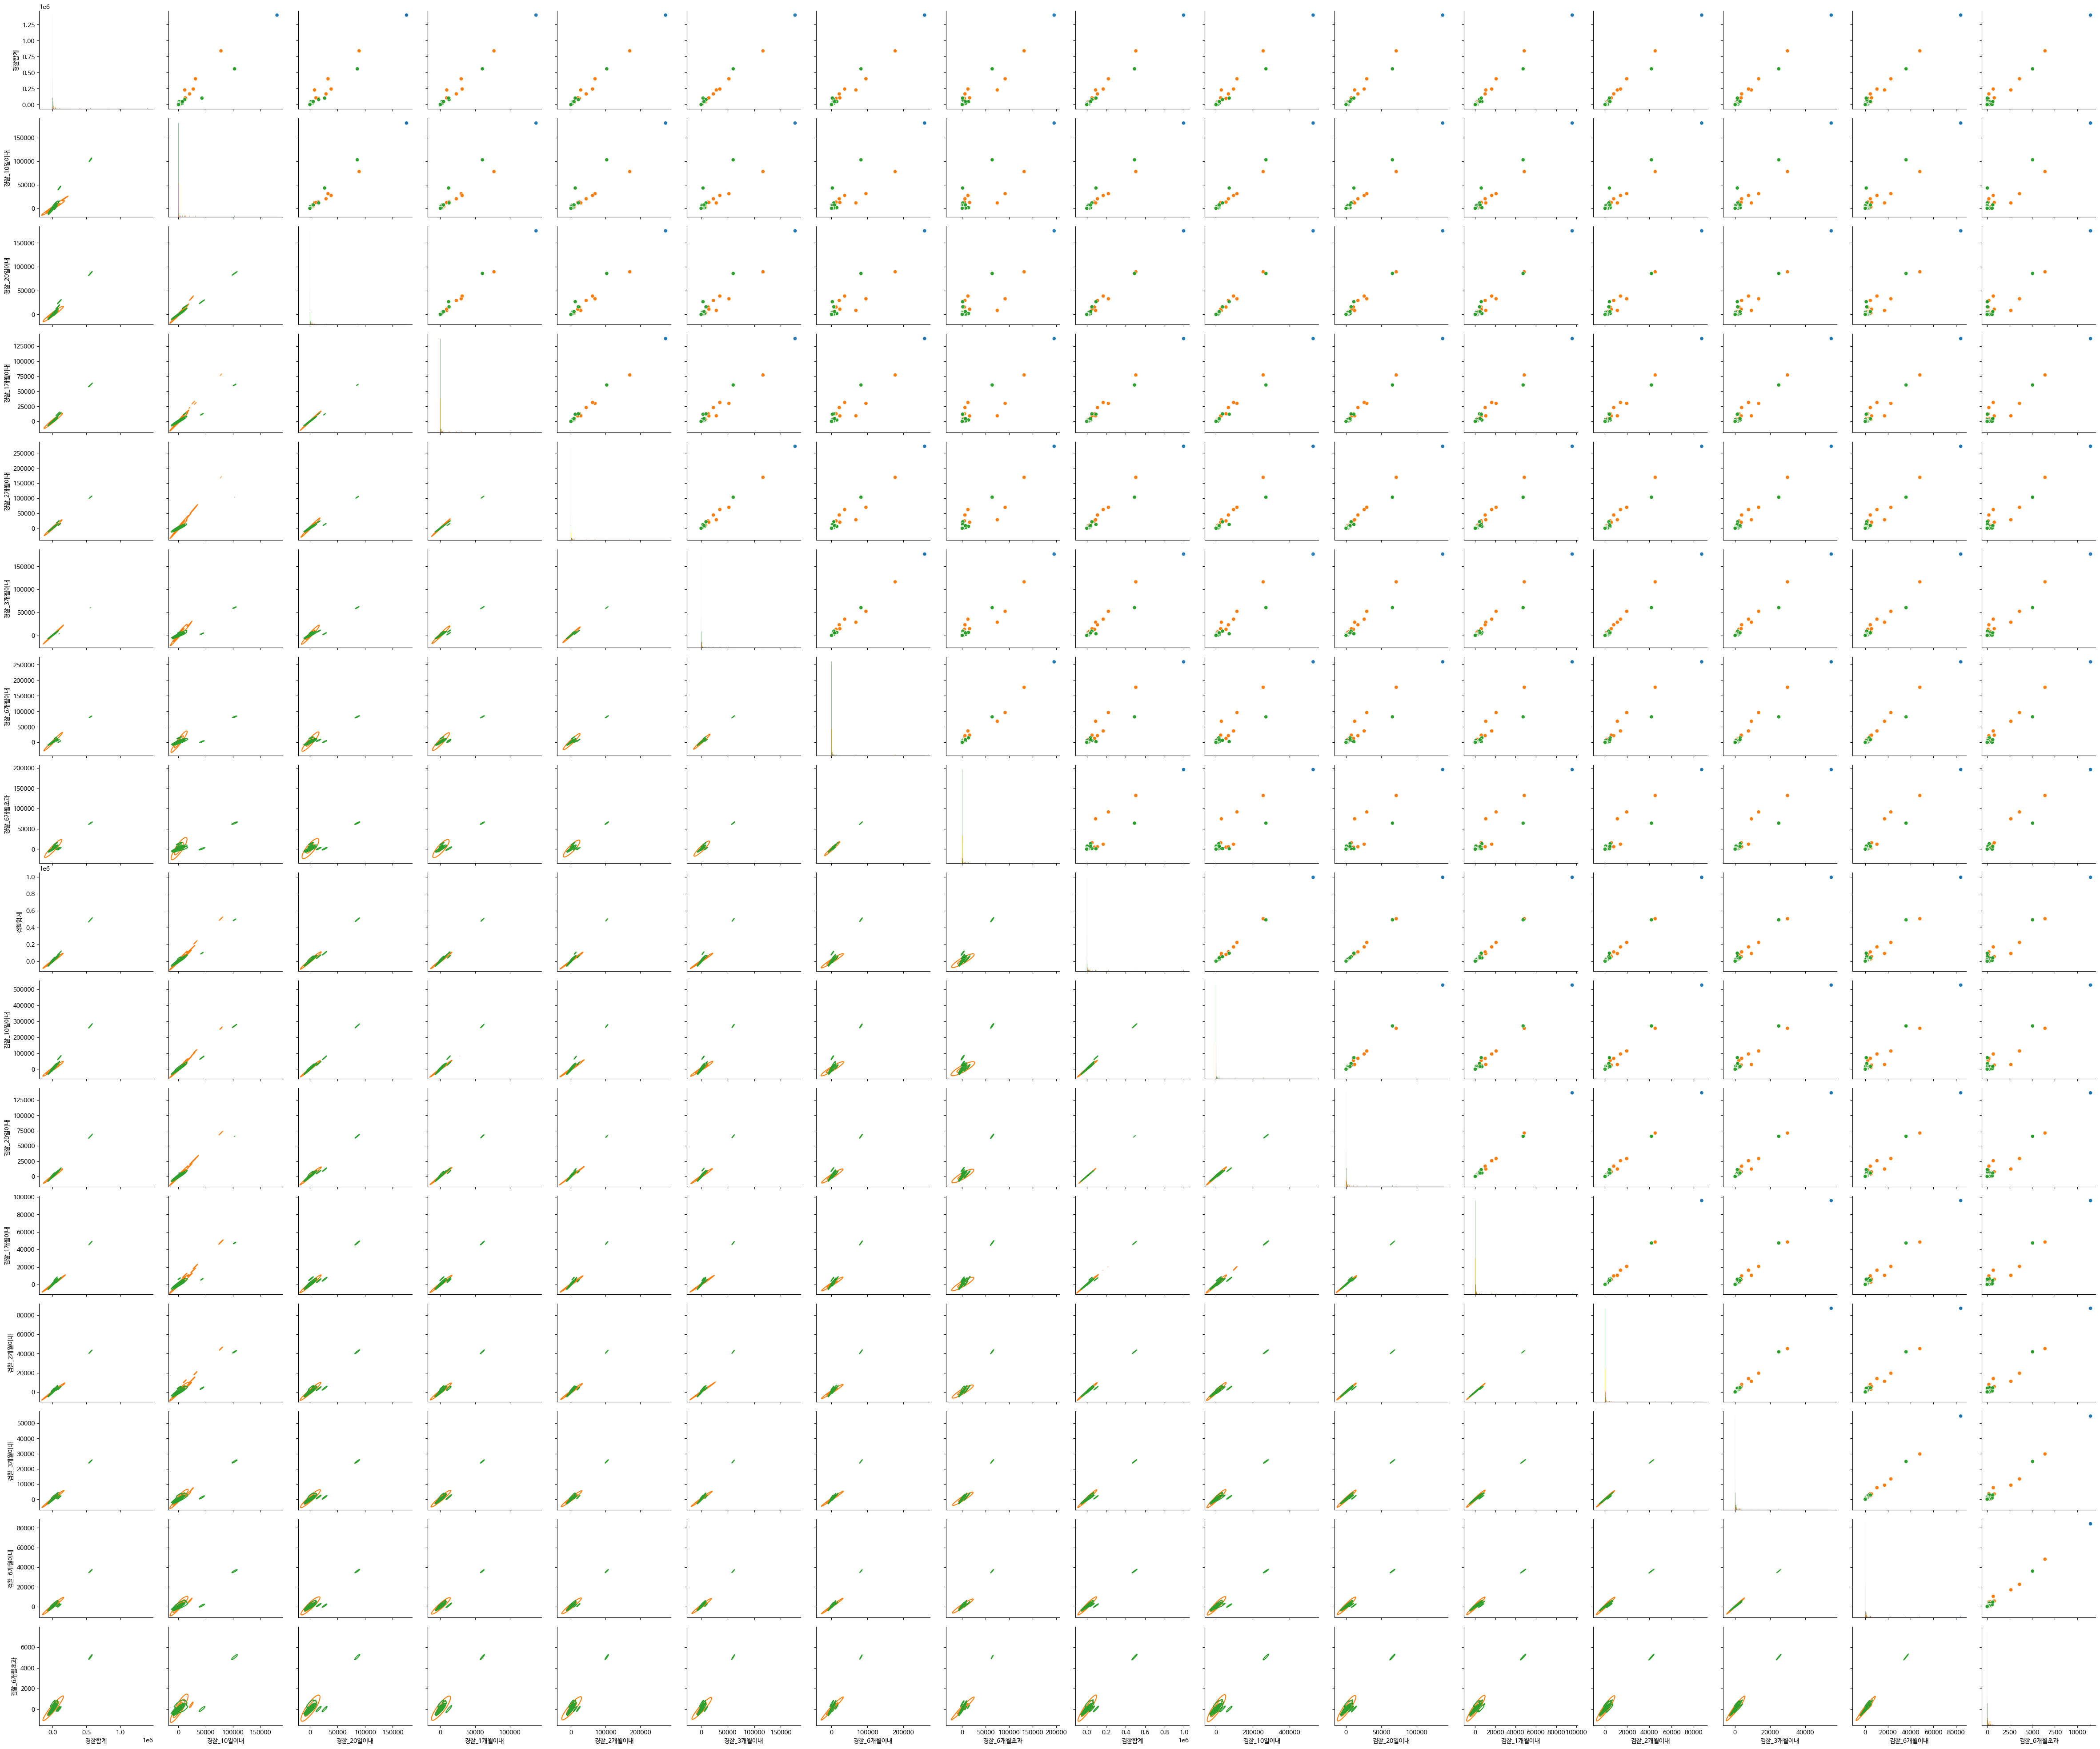

In [25]:
ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "범죄별(1)")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

In [26]:
corr_mat = np.round(data[num_columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

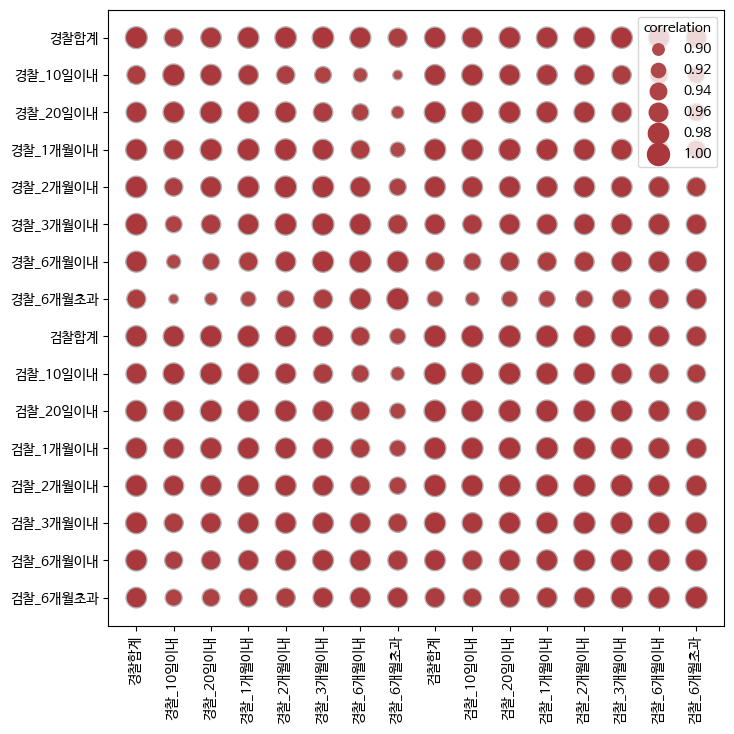

In [27]:
plt.figure(figsize=(8, 8))

ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
  label.set_rotation(90)

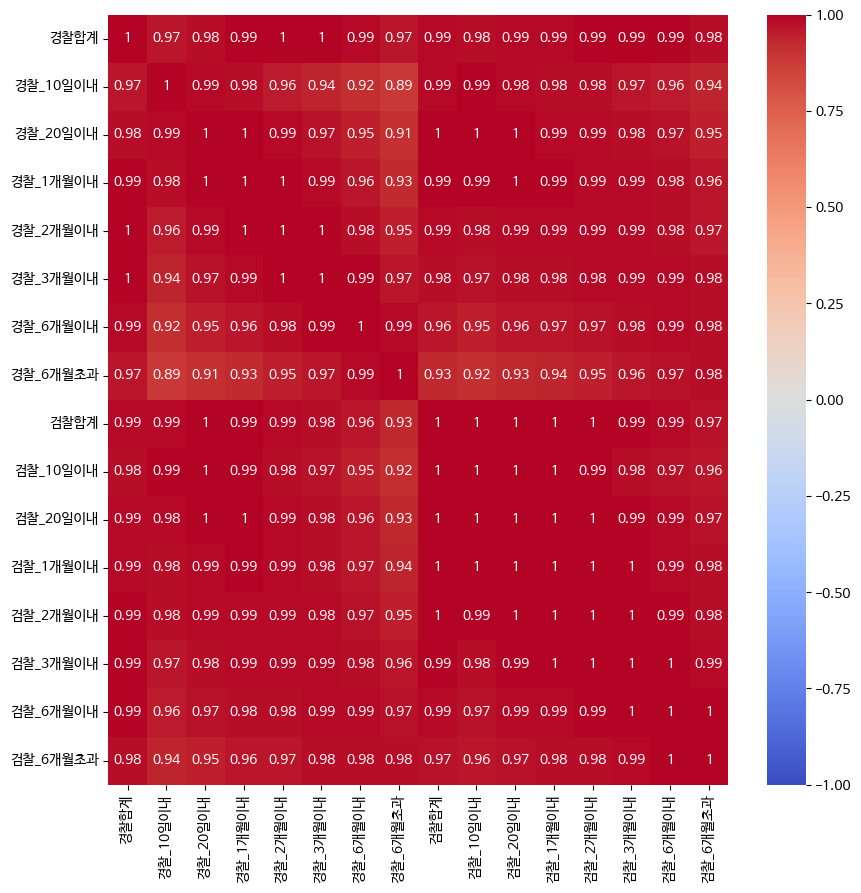

In [28]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.show()

<Figure size 1000x1000 with 0 Axes>

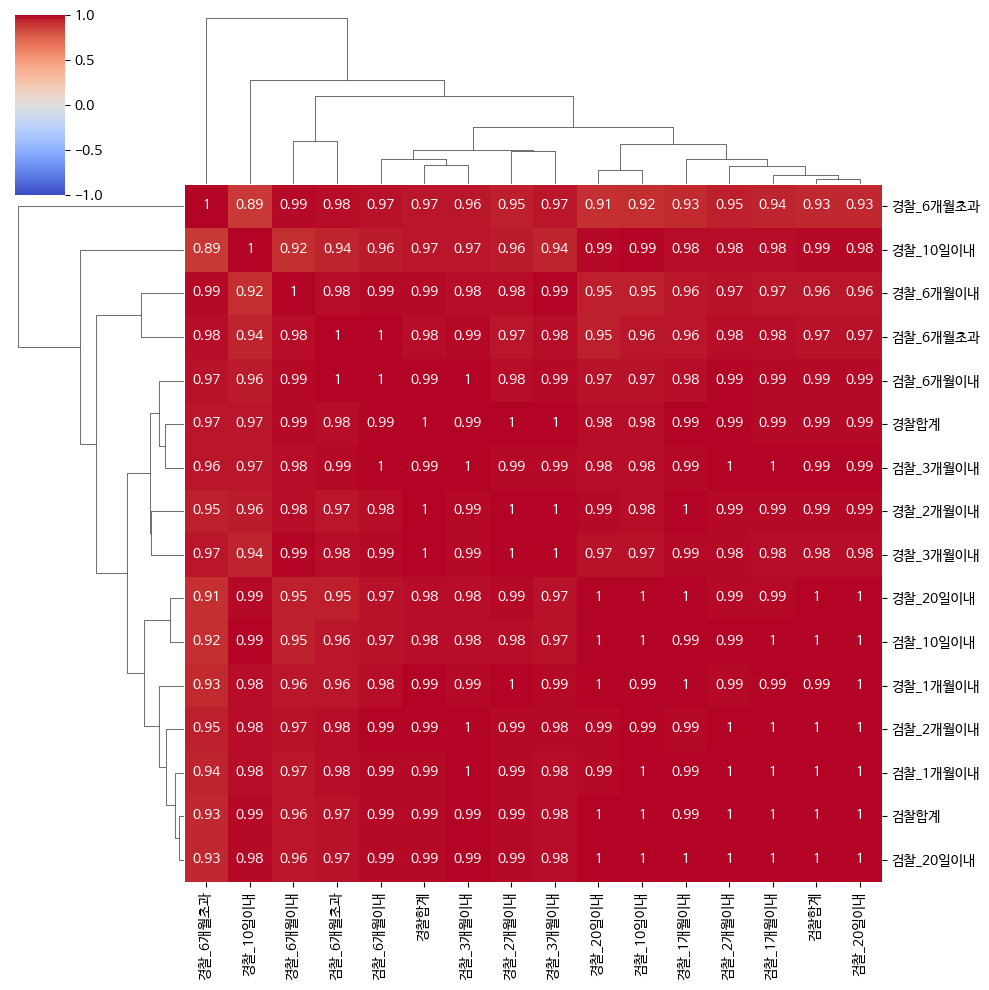

In [29]:
plt.figure(figsize=(10, 10))
ax = sns.clustermap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

In [30]:
data.describe(include="object")

범죄별(1)  범죄별(2) 범죄별(3)
count     175     175    175
unique      3     125     49
top      특별법범  기타형법범죄     소계
freq      117      17    127

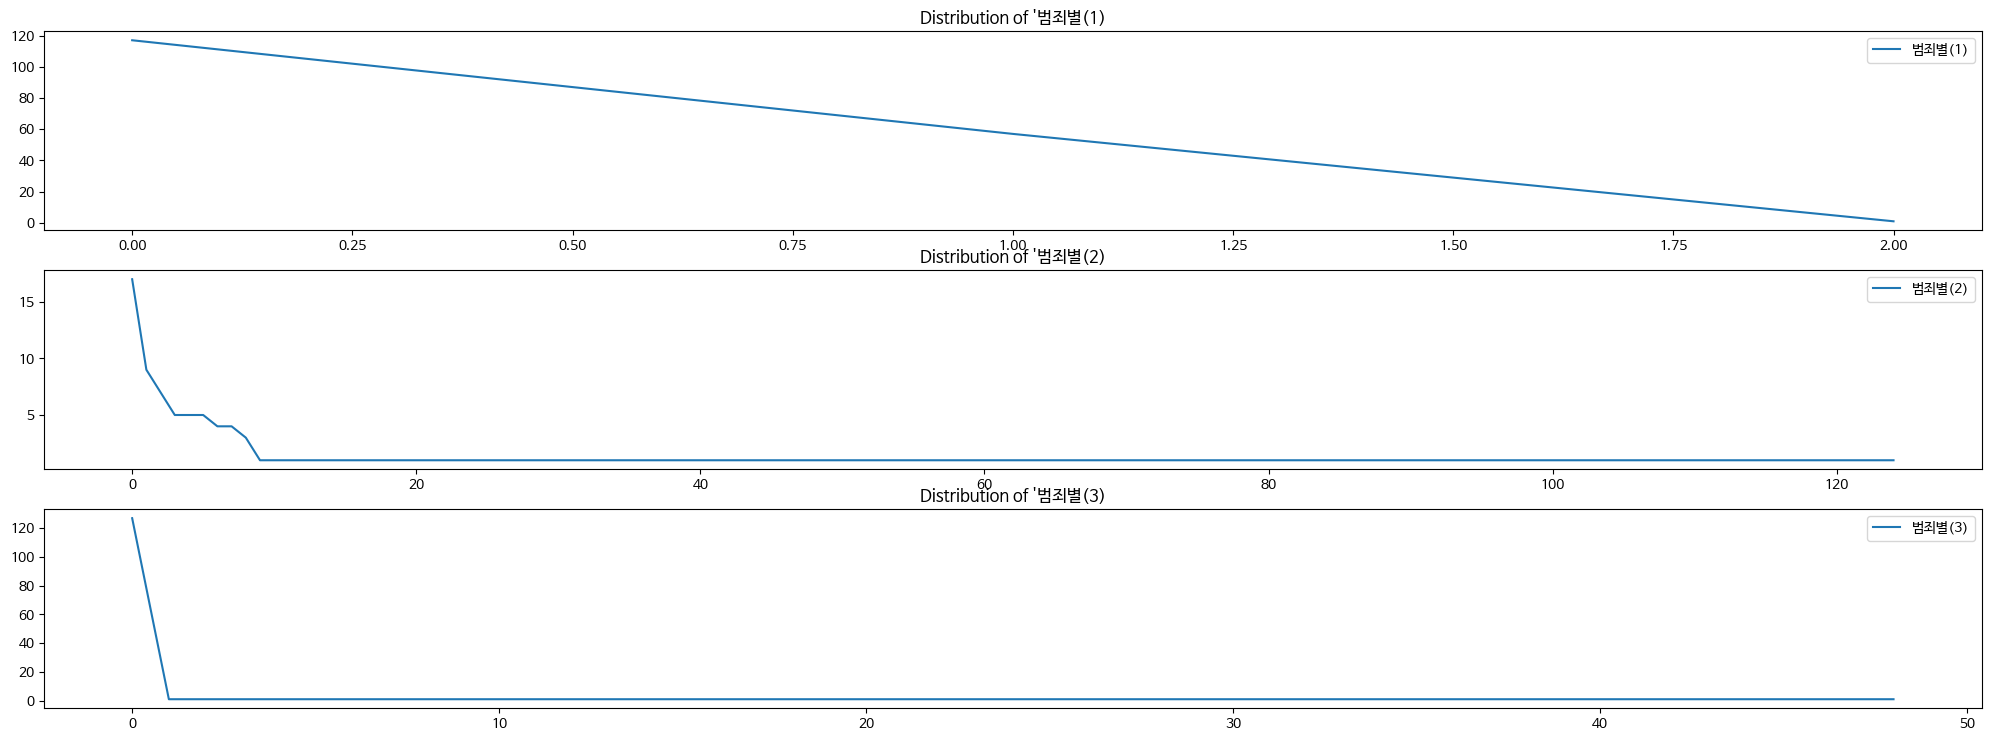

In [31]:
plt.figure(figsize = (25, 15))
for i in range(len(cat_columns)):
  plt.subplot(5, 1, i+1)
  sns.lineplot(data = pd.DataFrame(data[f"{cat_columns[i]}"].value_counts()).reset_index()).set(title = f"Distribution of '{cat_columns[i]}");

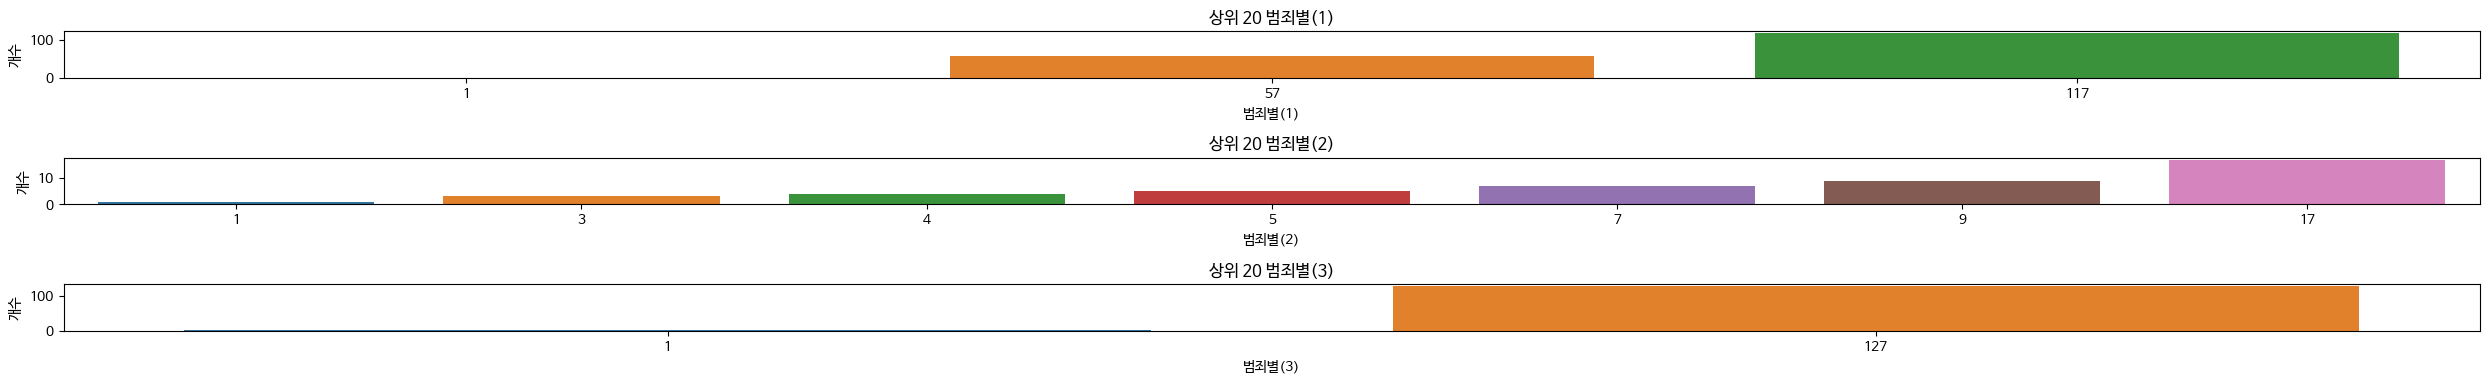

In [32]:
plt.figure(figsize=(25, 25))

for i in range(len(cat_columns)):
    plt.subplot(20, 1, i + 1)
    value_counts_df = data[f"{cat_columns[i]}"].value_counts().reset_index().head(20)
    sns.barplot(data=value_counts_df, x=f"{cat_columns[i]}", y=value_counts_df[value_counts_df.columns[1]].astype(int))
    plt.ylabel("개수")  # y축에 레이블 추가
    plt.title(f"상위 20 {cat_columns[i]}")  # 각 subplot에 제목 추가

plt.tight_layout()
plt.show()

In [33]:
plt.figure(figsize=(25, 30))
tmp = pd.DataFrame()

for i in cat_columns:
    value_counts_df = data[f"{i}"].value_counts().reset_index().head(20)
    tmp[f"{i}"] = value_counts_df["index"]  # 'count' 대신 'index'를 사용합니다.
    tmp[f"{i}_count"] = value_counts_df[f"{i}"]
tmp

범죄별(1)  범죄별(1)_count    범죄별(2)  범죄별(2)_count 범죄별(3)  범죄별(3)_count
0   특별법범           117    기타형법범죄            17     소계           127
1    형법범            57  강력범죄(폭력)             9     수뢰             1
2     합계             1      재산범죄             7  도박과복표             1

<Figure size 2500x3000 with 0 Axes>

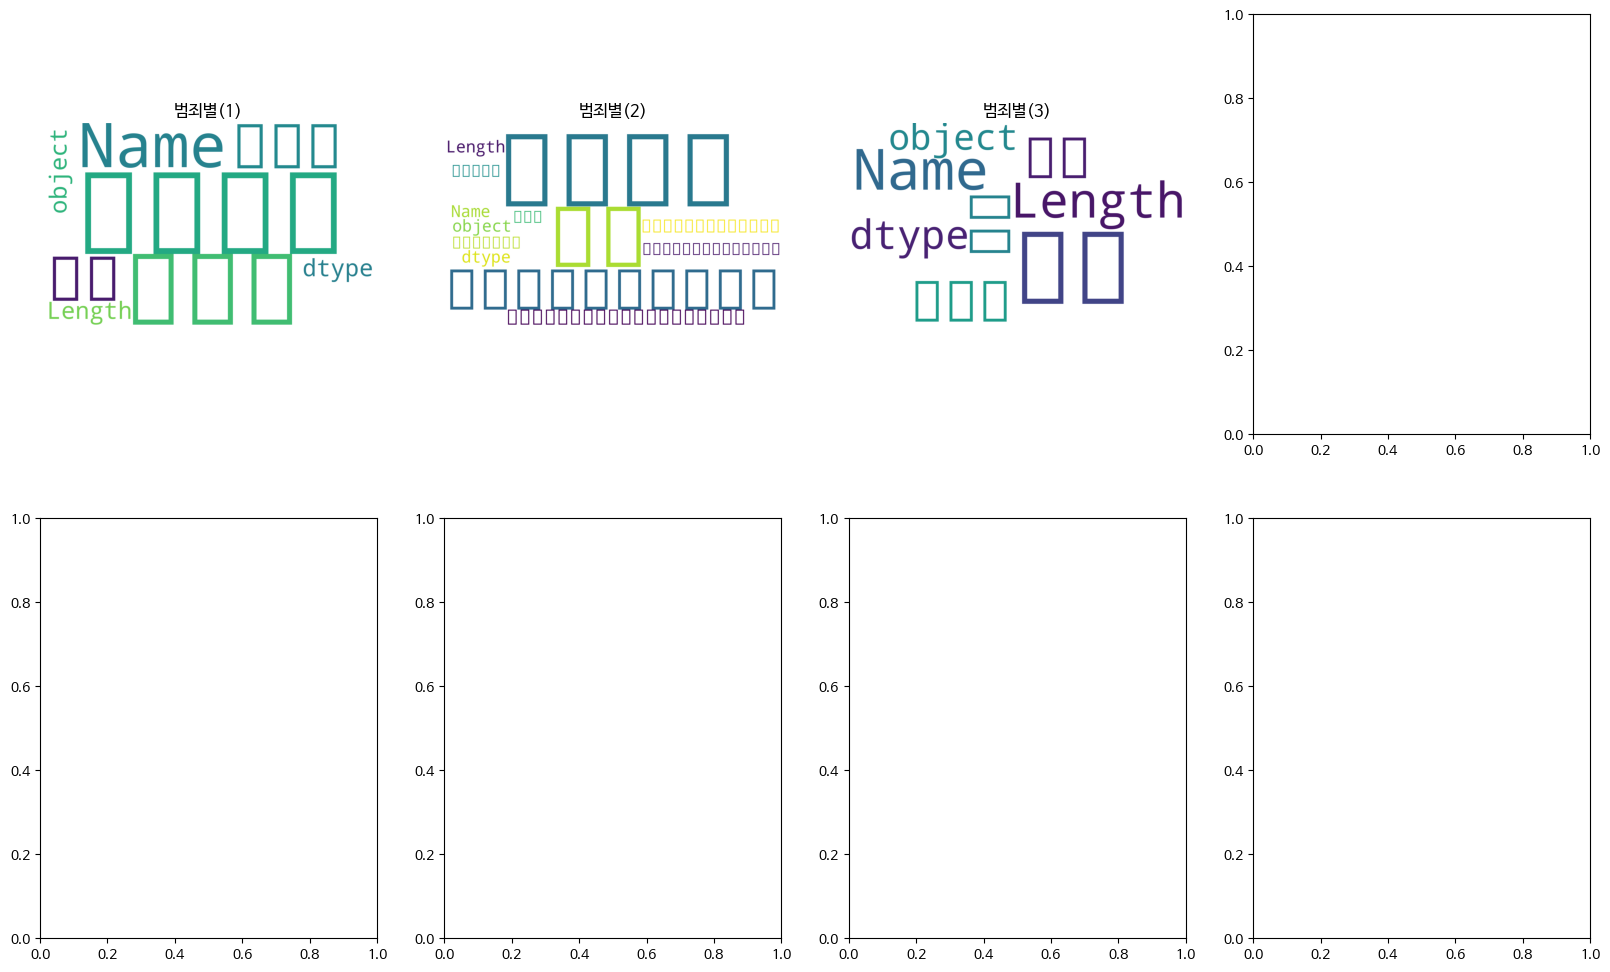

In [34]:
wc = WordCloud(height=1200, width=2000, random_state=101, background_color='white')
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(cat_columns):
    op = wc.generate(str(data[c]))
    x = axes[i].imshow(op)
    x = axes[i].set_title(c.upper())
    x = axes[i].axis('off')

In [35]:
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
    label = LabelEncoder()
    label = label.fit(data[col])
    data[col] = label.transform(data[col])

In [36]:
corr_mat = np.round(data[columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

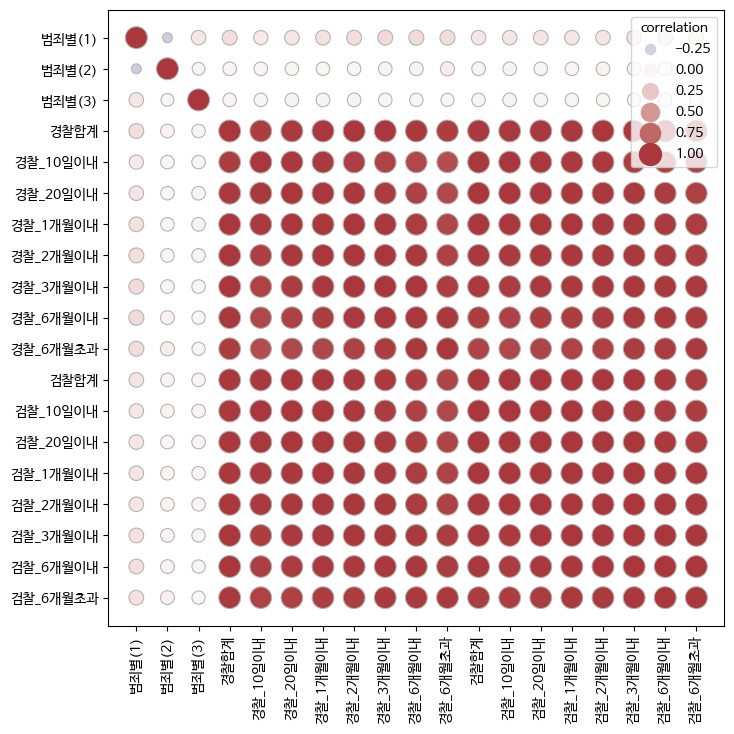

In [37]:
plt.figure(figsize=(8, 8))

ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
    label.set_rotation(90)

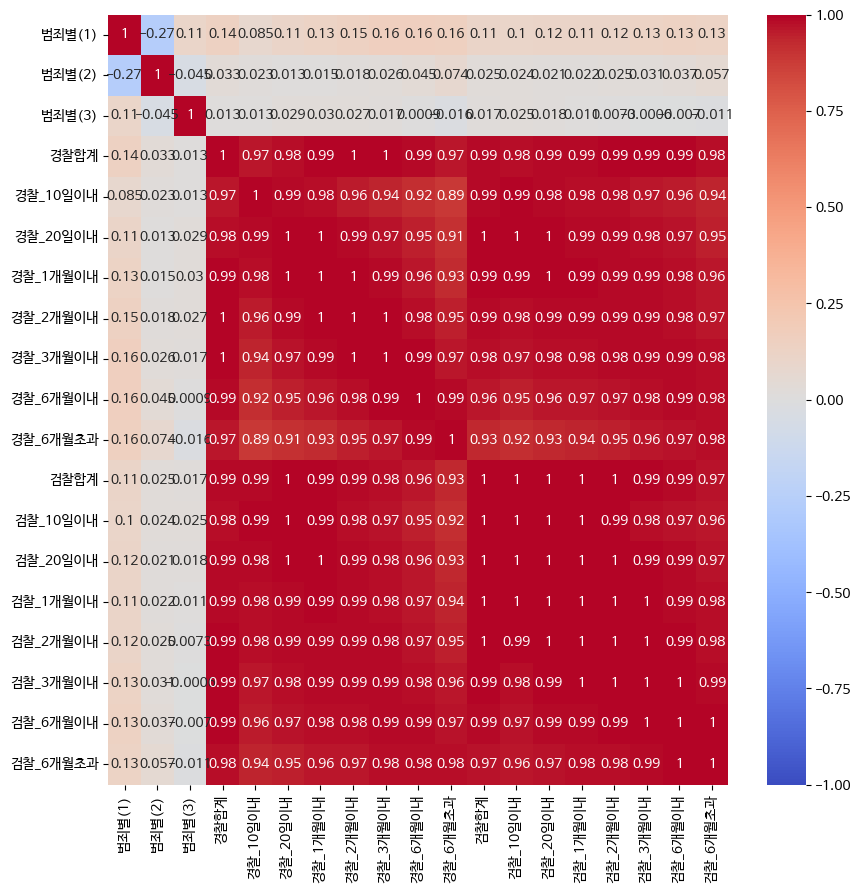

In [38]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

<Figure size 1000x1000 with 0 Axes>

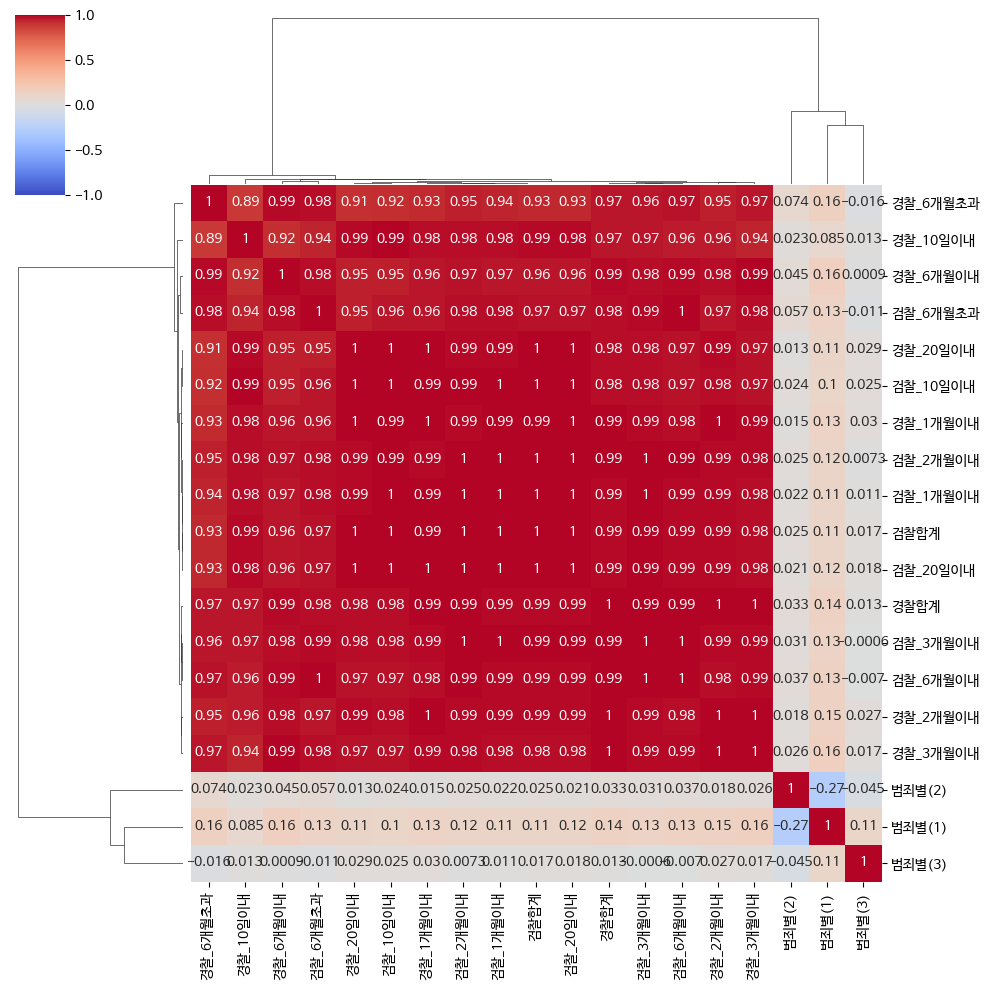

In [39]:
plt.figure(figsize=(10, 10))
ax = sns.clustermap(corr_mat, vmin=-1, vmax=1, annot=True, cmap="coolwarm")